##                        Sales of summer clothes in E-commerce Wish

### Problem Statement

The dataset contains product listings as well as products ratings and sales performance.With this,
1.  We can start to look for correlations and patterns regarding the success of a product and the various components, 

2.  May look for top categories of products so that you know what sells best

3.  How about the relationship between the quality of a product (ratings) and its success ?

4.  Does the price factor into this ?

5.  Build a model on product price as a dependent variaable.

### Infos on Columns
1. **title** : Title for localized for european countries. May be the same as title_orig if the seller did not offer a translation.

2. **title_orig** : Original english title of the product.

3. **price** : price for the buyer

4. **retail_price** : Retail price, or reference price in other stores/places. Used by the seller to indicate a regular value or the price before discount.

5. **currency_buyer** : currency of the prices

6. **units_sold** : Number of units sold. Lower bound approximation by steps

7. **uses_ad_boosts** : Whether the seller paid to boost his product within the platform (highlighting, better placement or whatever).

8. **rating** : Mean product rating.

9. **rating_count** : Total number of ratings of the product

10. **rating_five_count** : Number of 5-star ratings (there are also similar rating columns for four, three .. stars)

11. **badges_count** : Number of badges the product or the seller have.

12. **badge_local_product** : A badge that denotes the product is a local product. Conditions may vary (being produced locally, or something else). Some people may prefer buying local products rather than. 1 means Yes, has the badge.

13. **badge_product_quality** : Badge awarded when many buyers consistently gave good evaluations 1 means Yes, has the badge

14. **badge_fast_shipping** : Badge awarded when this product's order is consistently shipped rapidly

15. **tags** : tags set by the seller

16. **product_color** : Product's main color

17. **product_variation_size_id** : One of the available size variation for this product

18. **product_variation_inventory** : Inventory the seller has. Max allowed quantity is 50

19. **shipping_option_price** : shipping price

20. **shipping_is_express** : whether the shipping is express or not. 1 for True

21. **countries_shipped_to** : Number of countries this product is shipped to. Sellers may choose to limit where they ship a product to

22. **inventory_total** : Total inventory for all the product's variations (size/color variations for instance)

23. **has_urgency_banner** : whether there was an urgency banner with an urgency

24. **merchant_rating** : merchant's rating

#### 1) Import libraries

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
#to display entire rows and columns
pd.options.display.max_columns=None
pd.options.display.max_rows=None
# supress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

In [117]:
#set the plot size
plt.rcParams['figure.figsize'] = (10, 6)

#### 2) Load the dataset

In [118]:
data=pd.read_csv('summer-products-with-rating-and-performance_2020-08.csv')
data.head(2)

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.0,14,EUR,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,M,50,Livraison standard,4,0,34,50,1.0,Quantité limitée !,CN,zgrdejia,zgrdejia,(568 notes),568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.0,22,EUR,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,XS,50,Livraison standard,2,0,41,50,1.0,Quantité limitée !,CN,SaraHouse,sarahouse,"83 % avis positifs (17,752 notes)",17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08


In [119]:
#print shape
print('Dimensions of dataset :',data.shape)

Dimensions of dataset : (1573, 43)


In [120]:
#check the datatypes and null vallue presence
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   currency_buyer                1573 non-null   object 
 5   units_sold                    1573 non-null   int64  
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   rating_count                  1573 non-null   int64  
 9   rating_five_count             1528 non-null   float64
 10  rating_four_count             1528 non-null   float64
 11  rating_three_count            1528 non-null   float64
 12  rating_two_count              1528 non-null   float64
 13  rat

Interpretation:
   All features are in correct format but some features has nan values.

### 3) Exploratory data Analysis

#### 3.1) Univariate Analysis

In [121]:
#Check unit sold range
print('Units sold range is lies between :',data['units_sold'].min(), 'to',data['units_sold'].max())

Units sold range is lies between : 1 to 100000


In [122]:
#check the mean of unit price
print('mean of unit price :',data['price'].mean())

mean of unit price : 8.325371900826434


In [123]:
#check the median of unit price
print('median of unit price :',data['price'].median())

median of unit price : 8.0


In [124]:
#check the mode of unit price
print('mode of unit price :',data['price'].mode()[0])

mode of unit price : 8.0


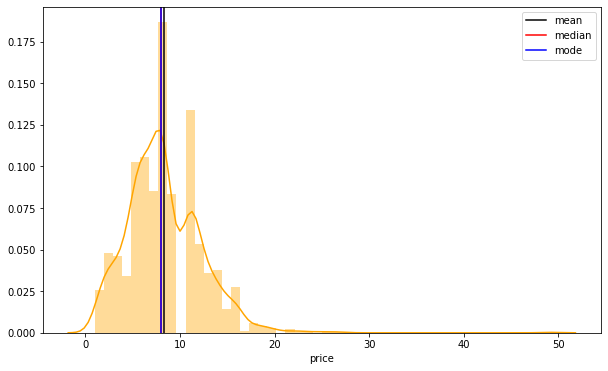

skewness of price : 1.31589130005404


In [125]:
#check distribution of price 
sns.distplot(data.price,color='orange')
plt.axvline(x=data['price'].mean(), color='black',label='mean')
plt.axvline(x=data['price'].median(), color='red',label='median')
plt.axvline(x=data['price'].mode()[0], color='blue',label='mode')
plt.legend()
plt.show()

print('skewness of price :',data.price.skew())

In [126]:
print('Three sigma value is :',data['price'].mean()+3*data['price'].std())  
# price of the product is not folowing Gaussian distribution

Three sigma value is : 20.12146134553747


 Interpretation: Some products cost are high compared to other products cost.

In [127]:
#Check the which product is sold more
print('This is the product peoples are prepared more:',data['title'].mode()[0])
#French-> English:New Summer Fashion Women Casual Dress O-neck Loose Big Swing Sleeveless Skirt Soild Color Beach Dress

This is the product peoples are prepared more: Nouvelle mode d'été femmes robe décontractée col rond lâche Big Swing jupe sans manches Soild couleur robe de plage


In [128]:
#Top merchant 
print('Top seller :',data['merchant_name'].mode()[0])
#Chinese-> English:Guangzhou Wei Shi Wei Clothing Co., Ltd

Top seller : 广州唯适唯服饰有限公司


In [129]:
print('Top5 colors Peoples choosing most is:','\n',data['product_color'].value_counts()[:5])

Top5 colors Peoples choosing most is: 
 black     302
white     254
yellow    105
pink       99
blue       99
Name: product_color, dtype: int64


In [130]:
import plotly.graph_objects as go
labels = data.origin_country.value_counts(normalize=True).index.values

values  =data.origin_country.value_counts().values

# Create Pie Chart

fig = go.Figure()
fig.add_trace(go.Pie(labels=labels, values=values))#New traces can be added to a graph object figure using the add_trace() method. This method accepts a graph object trace (an instance of go.Scatter, go.Bar, etc.) and adds it to the figure
fig.update_layout(title="Country of Origin of Product in Wish", legend_title="Countries", template="plotly_white")#updating properties

Interpretation: Seems the products mostly originate from Canada

In [131]:
data1=data.copy()

In [132]:

data1['discounted_price'] = data1['retail_price'] - data1['price']
prices_by_country = data1[['price','discounted_price','retail_price','origin_country']].groupby('origin_country').mean()

In [133]:
fig = go.Figure()

fig.add_trace(go.Bar(x=prices_by_country.index.values, y=prices_by_country.price, name="Price"))
fig.add_trace(go.Scatter(x=prices_by_country.index.values, y=prices_by_country.discounted_price, name="Discounted Price"))
fig.add_trace(go.Bar(x=prices_by_country.index.values, y=prices_by_country.retail_price, name="Retail Price"))
fig.update_layout(title="Prices Categories By Country", xaxis_title="Countries", yaxis_title="Avg Discount Prices", template="plotly_white", legend_title="Legend")

Interpretation:
The graph, displpays that theres a heavy discounts on prodcuts from Venezuela as displayed by red line by avg of around 27 euros.

Surprisingly, from the period of July,2020, when the data was taken, selling prices are higher than retail prices in countries like Austria, GB and Singapore. Canada where most of the product in the data is coming from is sold on average of around 8.5 euros with discounts on average of around 14 euros.

In [134]:
data1[data.origin_country=="CN"]['price'].describe()

count    1516.000000
mean        8.341629
std         3.940071
min         1.000000
25%         5.830000
50%         8.000000
75%        11.000000
max        49.000000
Name: price, dtype: float64

About 75% of products coming from Canada are near 10 euros.

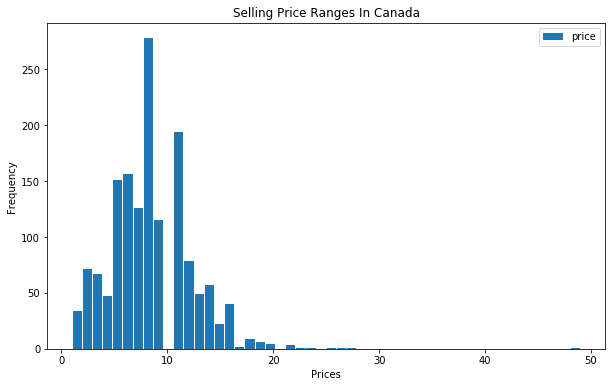

In [135]:

data1[data1.origin_country=="CN"]['price'].plot(kind="hist", bins=50,rwidth=.9)

plt.title("Selling Price Ranges In Canada")
plt.xlabel('Prices')
plt.ylabel('Frequency')
plt.legend()

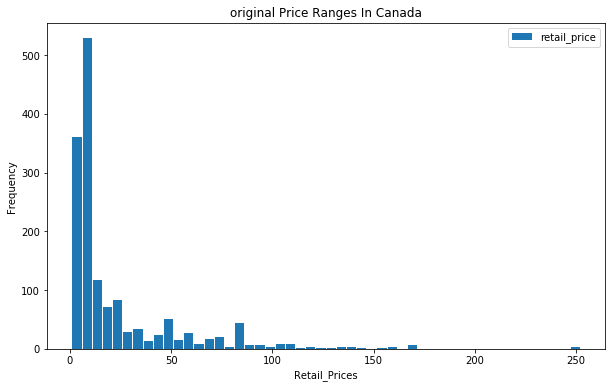

In [136]:

data1[data1.origin_country=="CN"]['retail_price'].plot(kind="hist", bins=50,rwidth=0.9)
plt.title("original Price Ranges In Canada")
plt.xlabel('Retail_Prices')
plt.ylabel('Frequency')
plt.legend()

In [137]:
data1['shipping_option_name'].value_counts()

Livraison standard         1508
Standard Shipping            21
Envio Padrão                  9
Expediere Standard            6
Envío normal                  5
الشحن القياسي                 4
Standardversand               3
Livraison Express             3
Стандартная доставка          3
Standardowa wysyłka           3
การส่งสินค้ามาตรฐาน           2
Standart Gönderi              2
Spedizione standard           2
Ekspresowa wysyłka            1
ការដឹកជញ្ជូនតាមស្តង់ដារ       1
Name: shipping_option_name, dtype: int64

Livraison standard is quite populuar option for shipping. Lets check the prices of the company.

In [138]:
livrasion_prices = data1[data1.shipping_option_name =='Livraison standard']['shipping_option_price'].value_counts().index.values
livrasion_prices_frquency = data1[data1.shipping_option_name =='Livraison standard']['shipping_option_price'].value_counts().values

fig = go.Figure()
fig.add_trace(go.Pie(labels=livrasion_prices, values=livrasion_prices_frquency))
fig.update_layout(title="Livrasion Standard Prices", legend_title="Prices In Euros", template="plotly_white")

Interpretation:
    Most customers choose shipping options from 1-3 euros

#### 3.2) Multivariate Analysis

In [139]:
#print the 5point summary 
data.describe(include='all')

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
count,1573,1573,1573.000000,1573.000000,1573,1573.000000,1573.000000,1573.000000,1573.000000,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573,1532,1559,1573.000000,1573,1573.000000,1573.000000,1573.000000,1573.000000,473.0,473,1556,1573,1569,1572,1.573000e+03,1573.000000,1573,1573.000000,226,1573,1573,1573,1573,1573
unique,1201,1203,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1230,101,106,NaN,15,NaN,NaN,NaN,NaN,NaN,2,6,958,957,1058,NaN,NaN,958,NaN,125,1341,1341,1341,1,1
top,Nouvelle mode d'été femmes robe décontractée c...,New Fashion Summer Women Casual Dress Round Ne...,NaN,NaN,EUR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Summer,Fashion,Necks,Skirts,Dress,Loose,Women'...",black,S,NaN,Livraison standard,NaN,NaN,NaN,NaN,NaN,Quantité limitée !,CN,guangzhouweishiweifushiyouxiangongsi,广州唯适唯服饰有限公司,"83 % avis positifs (32,168 notes)",NaN,NaN,558c2cdc89d53c4005ea2920,NaN,https://s3-us-west-1.amazonaws.com/sweeper-pro...,https://www.wish.com/c/5e9a74e447f7d92c8db8d14b,https://contestimg.wish.com/api/webimage/5e9da...,5eaa6d9c8d99eb3ec06709f4,summer,2020-08
freq,24,24,NaN,NaN,1573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,302,641,NaN,1508,NaN,NaN,NaN,NaN,NaN,472,1516,15,15,14,NaN,NaN,15,NaN,12,3,3,3,1573,1573
mean,NaN,NaN,8.325372,23.288620,NaN,4339.005086,0.432931,3.820896,889.659250,442.263743,179.599476,134.549738,63.711387,95.735602,0.105531,0.018436,0.074380,0.012715,NaN,NaN,NaN,33.081373,NaN,2.345200,0.002543,40.456453,49.821360,1.0,NaN,NaN,NaN,NaN,NaN,2.649583e+04,4.032345,NaN,0.143675,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,3.932030,30.357863,NaN,9356.539302,0.495639,0.515374,1983.928834,980.203270,400.516231,311.690656,151.343933,214.075544,0.340709,0.134565,0.262472,0.112075,NaN,NaN,NaN,21.353137,NaN,1.024371,0.050379,20.301203,2.562799,0.0,NaN,NaN,NaN,NaN,NaN,7.847446e+04,0.204768,NaN,0.350871,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,1.000000,NaN,1.000000,0.000000,6.000000,1.000000,1.0,NaN,NaN,NaN,NaN,NaN,0.000000e+00,2.333333,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,5.810000,7.000000,NaN,100.000000,0.000000,3.550000,24.000000,12.000000,5.000000,4.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,6.000000,NaN,2.000000,0.000000,31.000000,50.000000,1.0,NaN,NaN,NaN,NaN,NaN,1.987000e+03,3.917353,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,8.000000,10.000000,NaN,1000.000000,0.000000,3.850000,150.000000,79.000000,31.500000,24.000000,11.000000,20.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,50.000000,NaN,2.000000,0.000000,40.000000,50.000000,1.0,NaN,NaN,NaN,NaN,NaN,7.936000e+03,4.040650,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,11.000000,26.000000,NaN,5000.000000,1.000000,4.110000,855.000000,413.500000,168.250000,129.250000,62.000000,94.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,50.000000,NaN,3.000000,0.000000,43.000000,50.000000,1.0,NaN,NaN,NaN,NaN,NaN,2.456400e+04,4.161797,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [140]:
#split the dataset into categorical and numerical for better understanding 
cat_data=data.select_dtypes(exclude=np.number)
num_data=data.select_dtypes(include=np.number)

In [141]:
cat_data.head(2)

,title,title_orig,currency_buyer,tags,product_color,product_variation_size_id,shipping_option_name,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_id,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,EUR,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,M,Livraison standard,Quantité limitée !,CN,zgrdejia,zgrdejia,(568 notes),595097d6a26f6e070cb878d1,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,EUR,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,XS,Livraison standard,Quantité limitée !,CN,SaraHouse,sarahouse,"83 % avis positifs (17,752 notes)",56458aa03a698c35c9050988,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08


In [142]:
num_data.head(2)

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture
0,16.0,14,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,0,0,50,4,0,34,50,1.0,568,4.128521,0
1,8.0,22,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,50,2,0,41,50,1.0,17752,3.899673,0


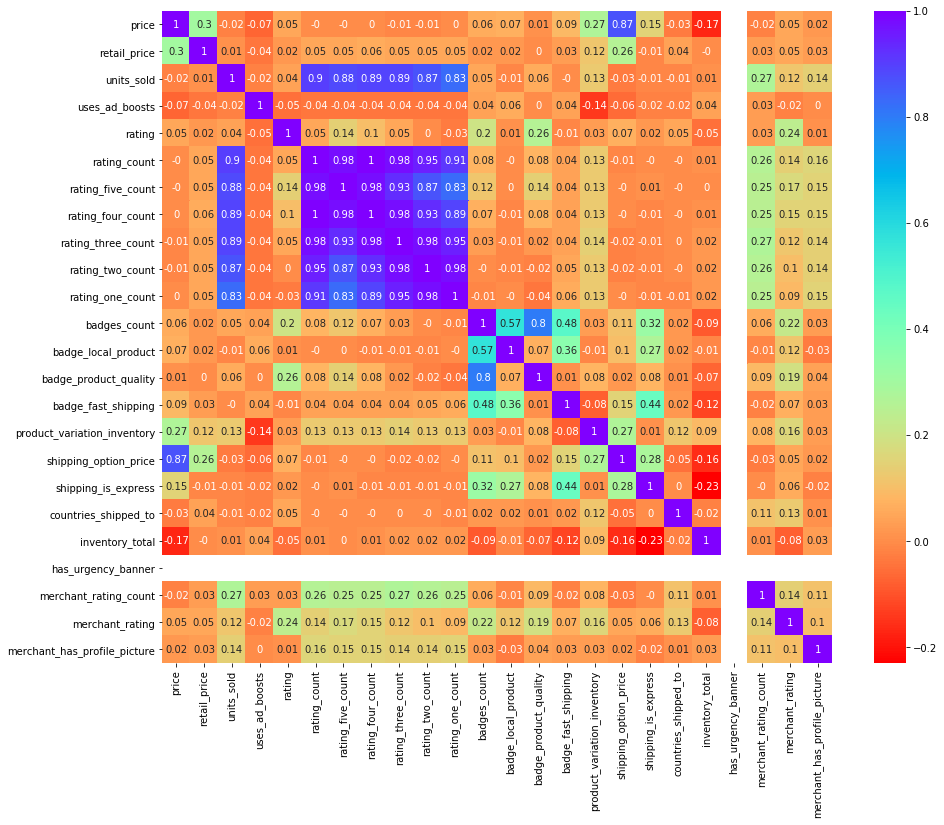

In [143]:
#Check correlation 
plt.figure(figsize=(15,12))
cor=round(num_data.corr(),2)
sns.heatmap(cor,annot=True,cmap='rainbow_r')

Interpretation: This graph tells about how the variables are correlated one among the others(strength and direction of pair variables).

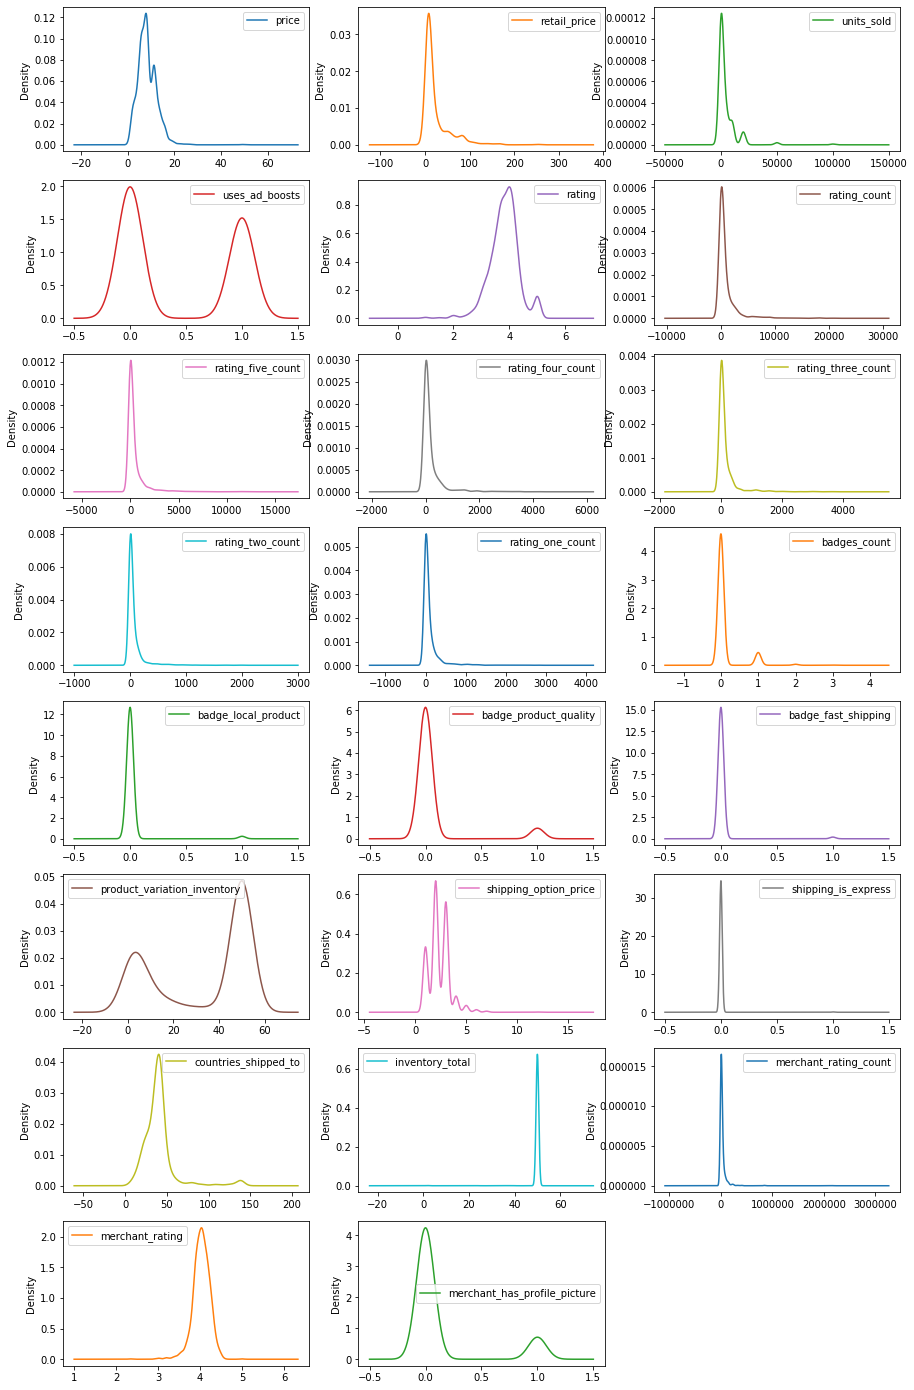

In [144]:
#Check the distribution of each features
dropped_has_urgency_banner=num_data.drop(columns=['has_urgency_banner'])
dropped_has_urgency_banner.plot(kind='kde',subplots=True,layout=(8,3),sharex=False,figsize=(15,25))
plt.show()

Interpretation: So many features are not normally distributed.

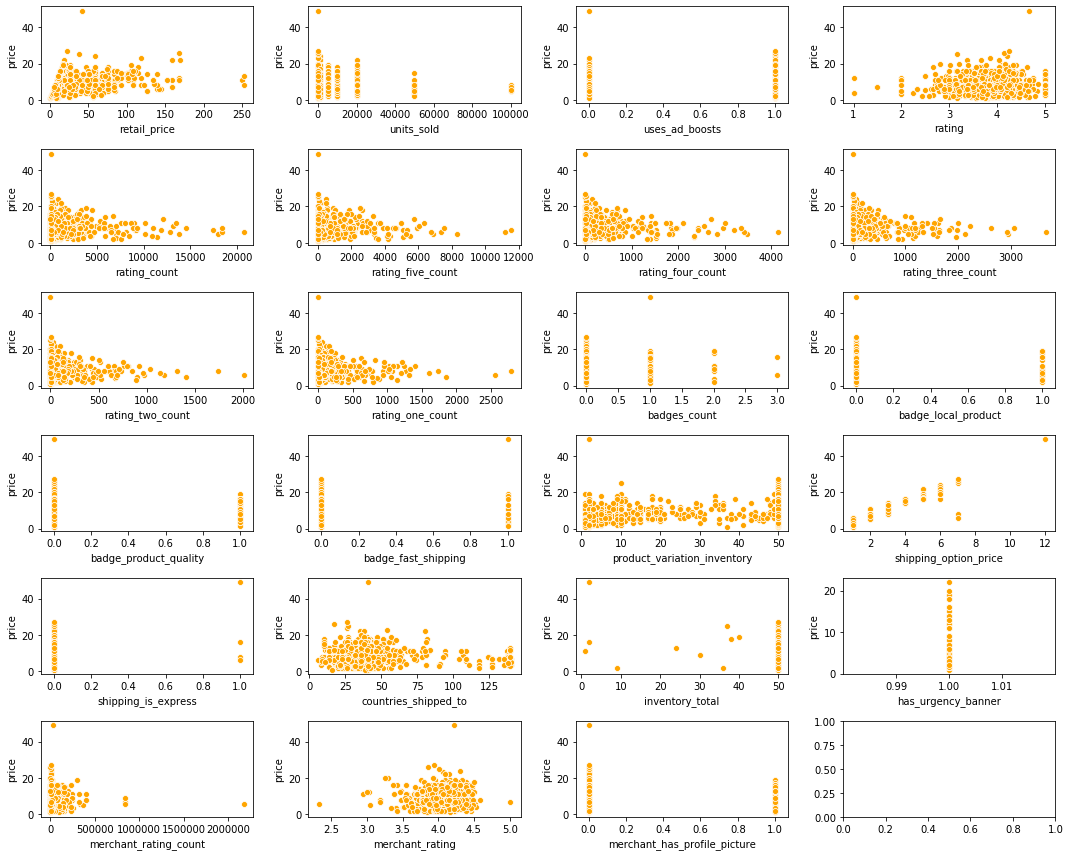

In [145]:
#Check the type of relation exist with the price
dropped_price=num_data.drop(columns=['price'])

fig, ax = plt.subplots(6, 4, figsize=(15, 12))
for variable, subplot in zip(dropped_price.columns, ax.flatten()):
    scttrplot = sns.scatterplot(x=variable, y='price', data=num_data, ax=subplot,color='orange')
    scttrplot.set_xlabel(variable, fontsize=10)
    

# avoid overlapping of the plots using tight_layout()    
plt.tight_layout()   

# display the plot
plt.show() 

Interpretation:Yes! some features are effecting the price and some features are not effecting.
     

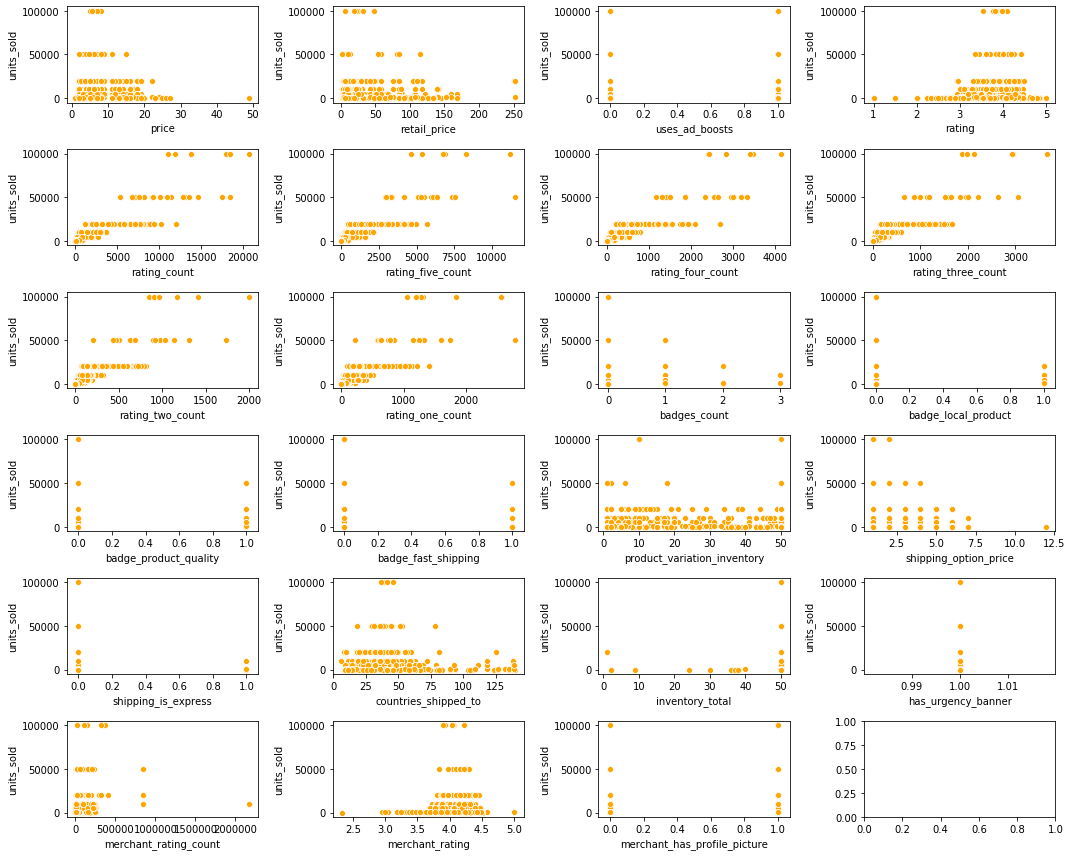

In [146]:
#Check the type of relation exist with the price
dropped_unitsold=num_data.drop(columns=['units_sold'])

fig, ax = plt.subplots(6, 4, figsize=(15, 12))
for variable, subplot in zip(dropped_unitsold.columns, ax.flatten()):
    scttrplot = sns.scatterplot(x=variable, y='units_sold', data=num_data, ax=subplot,color='orange')
    scttrplot.set_xlabel(variable, fontsize=10)
    

# avoid overlapping of the plots using tight_layout()    
plt.tight_layout()   

# display the plot
plt.show() 



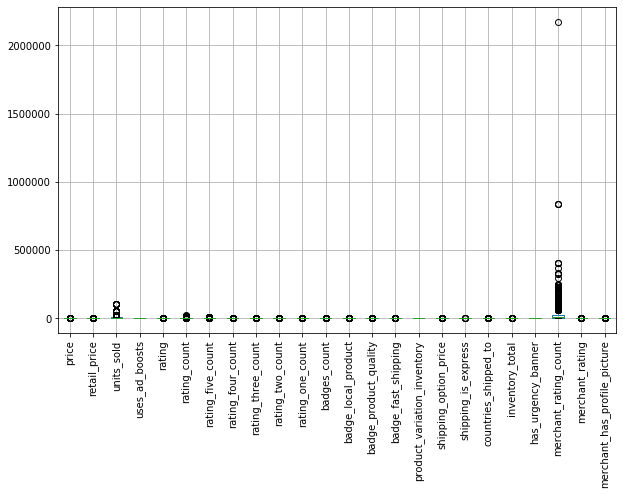

In [147]:
#Discover outliers
num_data.boxplot()
plt.xticks(rotation=90)
plt.show()

Interpretation:
    merchant_rating_count and units_sold have higher value so we can not visualize whole data properly so drop that features and analysis it.
    

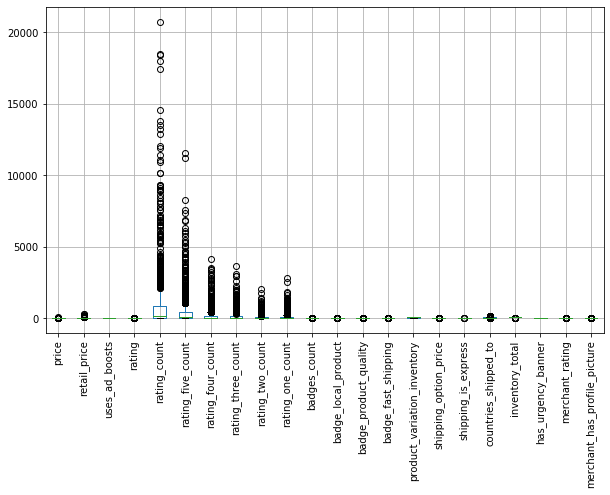

In [148]:
num_data2=num_data.drop(['merchant_rating_count','units_sold'],1)
num_data2.boxplot()
plt.xticks(rotation=90)
plt.show()

Interpretation:

    1)One product has a rating counts more than 20k.
    2)Two products has five_rating_counts more than 10k.

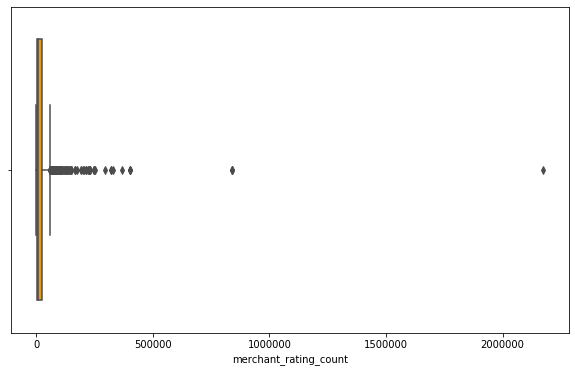

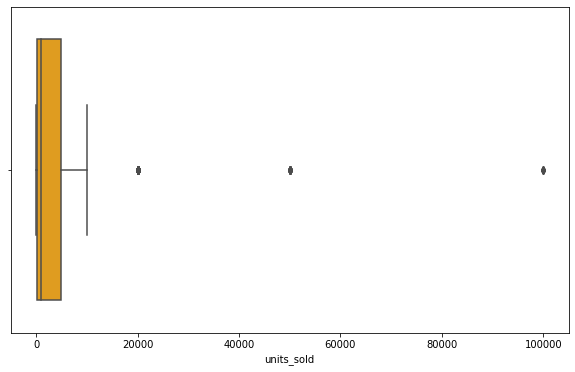

In [149]:
#Also check those features drop initially
for i in num_data[['merchant_rating_count','units_sold']].columns:
    sns.boxplot(num_data[i],color='orange')
    plt.show()

Interpetation:
    
    1) One merchant has rating counts of 20lacs[means high rated merchant].
    2) There is one product which sold maximum quantity[i.e 100000 units].
    

In [150]:
#numerical vs categorical anaylsis
df=pd.DataFrame(data.groupby(['product_id','title'])['units_sold'].max().head(5))
df.sort_values('units_sold',ascending=False)

,,units_sold
product_id,title,
53897eeeafddf70c91af1cda,T-shirt à manches courtes en mousseline de soie rouge et blanc d'été pour femme,100000
544b079d1280fa28eee9b380,Femmes Camisole extensible Spaghetti Strap Long Débardeur Slip Mini Dress 4Color SIZE XXL est disponible maintenant,100000
53c8f05046188e57778ac77c,S-XXL Mode Eté Printemps Femme Elastique Taille Haute en Dentelle Short Short Short Hot Pants,20000
54ab85ff509baf3e966f7f2a,Été volant pare-soleil anneau de bain voiture gonflable bébé flotteur siège bateau piscine outils accessoires pour enfants jouets,20000
535530635aefb0555ba4351f,Bonne Qualité 2014 Été Vente Chaude Zipper Shorts Mode Slim Hommes Causual Déchiré Jeans Pantalon Court,5000


Interpretation:
    These are the top5 products which sold maximum units.

### 4) Data Preparation 

#### 4.1) Data Processing and Wrangling

In [151]:
data.columns

Index(['title', 'title_orig', 'price', 'retail_price', 'currency_buyer',
       'units_sold', 'uses_ad_boosts', 'rating', 'rating_count',
       'rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'tags', 'product_color', 'product_variation_size_id',
       'product_variation_inventory', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'urgency_text',
       'origin_country', 'merchant_title', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture',
       'merchant_profile_picture', 'product_url', 'product_picture',
       'product_id', 'theme', 'crawl_month'],
      dtype='object')

In [152]:
#Drop the above mentioned features
data1=data.drop(columns=['title','title_orig','currency_buyer','tags','merchant_title','merchant_name','merchant_id','merchant_info_subtitle','merchant_has_profile_picture','merchant_profile_picture','product_id','theme','crawl_month','product_url','product_picture'])
data1.head(2)

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_rating_count,merchant_rating
0,16.0,14,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,0,0,white,M,50,Livraison standard,4,0,34,50,1.0,Quantité limitée !,CN,568,4.128521
1,8.0,22,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,green,XS,50,Livraison standard,2,0,41,50,1.0,Quantité limitée !,CN,17752,3.899673


In [153]:
#now check the shape
data1.shape

(1573, 28)

Interpretation: Features are reduce from 43 to 28  due to unique values. 

In [154]:
#drop the features which is having zero variance
var=data1.var()
var[var==0]

has_urgency_banner    0.0
dtype: float64

In [155]:
data1.drop(columns=['has_urgency_banner'],inplace=True)
data1.shape

(1573, 27)

In [156]:
data1.drop(columns=['badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping'],inplace=True)

data1.shape#check this

(1573, 23)

Interpretation:
    Now dataset is free of insignificant features.

#### 4.1.a) Missing value Treatment

In [157]:
#Check the missing value presence
no_missing_val=data1.isnull().sum()
missing_val_perc=data1.isnull().sum()*100/len(data1)
df=pd.concat([no_missing_val,missing_val_perc],1)
df.columns=['num_missing_val','missing_val_perc']
df

,num_missing_val,missing_val_perc
price,0,0.000000
retail_price,0,0.000000
units_sold,0,0.000000
uses_ad_boosts,0,0.000000
rating,0,0.000000
rating_count,0,0.000000
rating_five_count,45,2.860776
rating_four_count,45,2.860776
rating_three_count,45,2.860776
rating_two_count,45,2.860776


Interpretation:
    Only one feature whose missing value is 69.93% so, drop this feature and all others having missing values will be treated. 

In [158]:
#drop this feature
data1.drop(columns=['urgency_text'],inplace=True)
data1.shape

(1573, 22)

In [159]:
data2=data1.copy()

In [160]:
data2['rating_five_count'].mode()

0    1.0
1    5.0
dtype: float64

In [161]:
#fill nan rows with the zero
data2['rating_five_count']=data2['rating_five_count'].fillna(0)
data2['rating_four_count']=data2['rating_four_count'].fillna(0)
data2['rating_three_count']=data2['rating_three_count'].fillna(0)
data2['rating_one_count']=data2['rating_one_count'].fillna(0)
data2['rating_two_count']=data2['rating_two_count'].fillna(0)

In [162]:
#fill nan row with the mode value
data2['product_color']=data2['product_color'].fillna(data2['product_color'].mode()[0])
data2['product_color'].isnull().any()

False

In [163]:
#fill nan row with the mode value
data2['product_variation_size_id']=data2['product_variation_size_id'].fillna(data2['product_variation_size_id'].mode()[0])
data2['product_variation_size_id'].isnull().any()

False

In [164]:
#fill nan row with the mode value
data2['origin_country']=data2['origin_country'].fillna(data2['origin_country'].mode()[0])
data2['origin_country'].isnull().any()

False

In [165]:
#Now check the presence of any nan values 
data2.isnull().sum().sum()

0

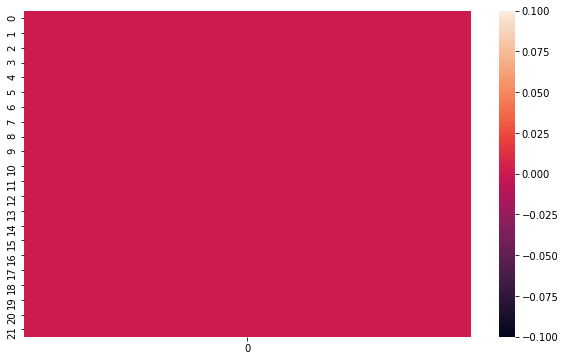

In [166]:
#check visually is there any null values
sns.heatmap(data2.isnull().sum().values.reshape(-1,1))

Interpretation:
    Fine!! all missing values are treated. Now dataset is free of missing values. 

In [167]:
#print shape
data2.shape

(1573, 22)

#### 4.1.b) Outlier Treatment

In [168]:
data2.reset_index(drop=True).head(2)

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,origin_country,merchant_rating_count,merchant_rating
0,16.0,14,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,white,M,50,Livraison standard,4,0,34,50,CN,568,4.128521
1,8.0,22,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,green,XS,50,Livraison standard,2,0,41,50,CN,17752,3.899673


In [169]:
#split the data into categorical and numerical 
cat_data2=data2.select_dtypes(exclude=np.number)
num_data2=data2.select_dtypes(include=np.number)

In [170]:
#print categorical features
cat_data2.head(2)

,product_color,product_variation_size_id,shipping_option_name,origin_country
0,white,M,Livraison standard,CN
1,green,XS,Livraison standard,CN


In [171]:
#print numerical features
num_data2.head(2)

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,merchant_rating_count,merchant_rating
0,16.0,14,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,50,4,0,34,50,568,4.128521
1,8.0,22,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,50,2,0,41,50,17752,3.899673


In [172]:
num_data2.shape

(1573, 18)

<Figure size 720x1080 with 0 Axes>

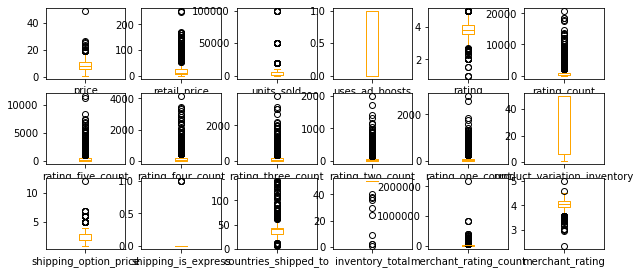

In [173]:
plt.figure(figsize=(10,15))
num_data2.plot(kind='box',subplots=True,layout=(4,6),sharex=False,sharey=False,color='orange',legend=True)
plt.show()

In [174]:
#Capping

for i in num_data2.columns:
    q1 = num_data2[i].quantile(0.25)
    q3 = num_data2[i].quantile(0.75)
    iqr = q3-q1
    ub = q3+1.5*iqr
    lb = q1-1.5*iqr
    num_data2[i] = num_data2[i].replace(num_data2[num_data2[i]>ub][i],num_data2[i].quantile(0.85))
    num_data2[i] = num_data2[i].replace(num_data2[num_data2[i]<lb][i],num_data2[i].quantile(0.15))
    
    

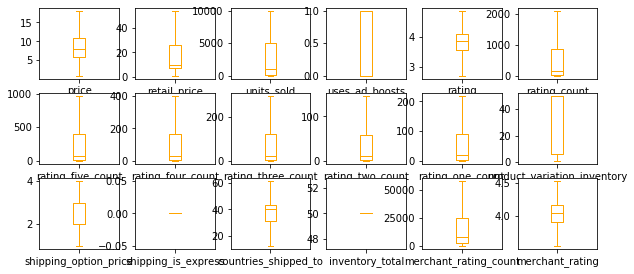

In [175]:
num_data2.plot(kind='box',subplots=True,layout=(4,6),sharex=False,color='orange')
plt.show()

Interpretation:
    Fine!! outlier treatment done with capping method.Now dataset is free of outliers.

#### 4.2) Feature Engineering

In [176]:
def encoding_prod_var(name):
    if name == 28 | 29 \
    or name == "Size -XXS" \
    or name == "SIZE-XXS":
        return "XXS"
    elif name == 30 | 31 \
    or name == "XS." \
    or name == "Size-XS" \
    or name == "SIZE XS":
        return "XS"
    elif name == 32 | 33 \
    or name == "S." \
    or name == "Suit-S" \
    or name == "Size S" \
    or name == "size S" \
    or name == "Size--S" \
    or name == "Size-S" \
    or name == "S Pink" \
    or name == "s":
        return "S"
    elif name == 34 \
    or name == "M." \
    or name == "Size M":
        return "M"
    elif name == 35 \
    or name == "L." \
    or name == "SizeL":
        return "L"
    elif name == 36 \
    or name == "X   L":
        return "XL"
    elif name == 37 \
    or name == "2XL":
        return "XXL"
    elif name == 'XXXS' \
    or name == 'XXS' \
    or name == 'XS' \
    or name == 'S' \
    or name == 'M' \
    or name == 'L' \
    or name == 'XL' \
    or name == 'XXL' \
    or name == 'XXXXL' \
    or name == 'XXXXXL':
        return name
    else:
        return "Other"
    
cat_data2['product_variation_size_id'] = cat_data2['product_variation_size_id'].replace(np.nan, "Other")
cat_data2['product_variation_size_id'] = cat_data2['product_variation_size_id'].apply(encoding_prod_var)

cat_data2["product_variation_size_id"].value_counts()

S         693
XS        369
M         206
XXS       104
Other     101
L          53
XXL        19
XL         18
XXXS        6
XXXXL       2
XXXXXL      2
Name: product_variation_size_id, dtype: int64

In [177]:
#Encoding product colors

def encoding_prod_color(name):
    if name == "armygreen" \
    or name == "khaki" \
    or name == "camouflage"\
    or name == "mintgreen" \
    or name == "lightgreen" \
    or name == "lightkhaki" \
    or name == "Army green" \
    or name == "army green" \
    or name == "darkgreen" \
    or name == "Green" \
    or name == "fluorescentgreen" \
    or name == "applegreen" \
    or name == "navy":
        return "green"
    
    elif name == "Black" \
    or name == "black & white" \
    or name == "black & blue" \
    or name == "coolblack" \
    or name == "black & green" \
    or name == "black & yellow":
        return "black"
    
    elif name == "navyblue" \
    or name == "lightblue" \
    or name == "skyblue" \
    or name == "Blue" \
    or name == "darkblue" \
    or name == "navy blue" \
    or name == "navyblue & white" \
    or name == "lakeblue":
        return "blue"
    
    elif name == "Yellow" \
    or name == "lightyellow" \
    or name == "star":
        return "yellow"
    
    elif name == "offwhite" \
    or name == "White" \
    or name == "whitefloral" \
    or name == "white & black" \
    or name == "white & green":
        return "white"
    
    elif name == "rosered" \
    or name == "rose" \
    or name == "Pink" \
    or name == "Rose" \
    or name == "pink & grey" \
    or name == "floral" \
    or name == "lightpink" \
    or name == "pink & white" \
    or name == "pink & black" \
    or name == "pink & blue" \
    or name == "dustypink":
        return "pink"
    
    elif name == "Red" \
    or name == "rouge" \
    or name == "lightred" \
    or name == "coralred" \
    or name == "watermelonred" \
    or name == "Rouge":
        return "red"
    
    elif name == "Orange" \
    or name == "orange-red" \
    or name == "apricot":
        return "orange"
    
    elif name == 'coffee':
        return "brown"
    
    elif name == "lightgrey" \
    or name == "gray" \
    or name == "Grey" \
    or name == "grey":
        return "grey"
    
    elif name == 'white' \
    or name == 'black' \
    or name == 'yellow' \
    or name == 'pink' \
    or name == 'red' \
    or name == 'green' \
    or name == 'orange' \
    or name == 'grey' \
    or name == 'brown' \
    or name == "purple" \
    or name == "blue" \
    or name == 'beige':
        return name
    
    else:
        return "other"
    
cat_data2['product_color'] = cat_data2['product_color'].replace(np.nan, "Other")
cat_data2['product_color'] = cat_data2['product_color'].apply(encoding_prod_color)
cat_data2['product_color'].value_counts().head(50)

black     359
white     272
blue      159
green     156
pink      133
yellow    108
red        99
other      91
grey       83
purple     53
orange     32
beige      14
brown      14
Name: product_color, dtype: int64

In [178]:
from sklearn.preprocessing import LabelEncoder
def encoder(value):
    encode = LabelEncoder().fit(value)
    return (encode.transform(value))



cat_data2['product_color'] = encoder(cat_data2['product_color'])
cat_data2['product_variation_size_id'] = encoder(cat_data2['product_variation_size_id'])

In [179]:
cat_data2.head(2)

,product_color,product_variation_size_id,shipping_option_name,origin_country
0,11,1,Livraison standard,CN
1,4,5,Livraison standard,CN


In [180]:
cat_data2['product_color'].value_counts().head(5)

1     359
11    272
2     159
4     156
8     133
Name: product_color, dtype: int64

In [181]:
cat_data2['product_variation_size_id'].value_counts().head(5)     #3=S,5=XS,1=M,7=XXS,2=L

3    693
5    369
1    206
7    104
2    101
Name: product_variation_size_id, dtype: int64

In [182]:
cat_data2['Shipped_option'] = cat_data2['shipping_option_name'].apply(lambda x: 'Standard' if cat_data2['shipping_option_name'].any()=='Livraison standard' else 'Normal')
    
      

In [183]:
cat_data2.head(2)

,product_color,product_variation_size_id,shipping_option_name,origin_country,Shipped_option
0,11,1,Livraison standard,CN,Standard
1,4,5,Livraison standard,CN,Standard


In [184]:
#now drop shipping_option_name	

cat_data2.drop(columns=['shipping_option_name'],inplace=True)

In [185]:
cat_data2.head(2)

,product_color,product_variation_size_id,origin_country,Shipped_option
0,11,1,CN,Standard
1,4,5,CN,Standard


In [186]:
cat_data2['origin_country'].value_counts()

CN    1533
US      31
VE       5
SG       2
AT       1
GB       1
Name: origin_country, dtype: int64

In [187]:
cat_data2['product_color'].value_counts().head(5)

1     359
11    272
2     159
4     156
8     133
Name: product_color, dtype: int64

In [188]:
cat_data2=pd.get_dummies(cat_data2,columns=['origin_country','Shipped_option'],drop_first=True)

In [189]:
cat_data2.head(2)

,product_color,product_variation_size_id,origin_country_CN,origin_country_GB,origin_country_SG,origin_country_US,origin_country_VE
0,11,1,1,0,0,0,0
1,4,5,1,0,0,0,0


In [190]:
#concatenate

num_two_col=pd.concat([num_data2,cat_data2.iloc[:,:2]],axis=1)
num_two_col.head(2)

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,merchant_rating_count,merchant_rating,product_color,product_variation_size_id
0,16.0,14,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,50,4,0,34,50,568,4.128521,11,1
1,8.0,22,10000,1,3.45,1632,771.4,323.2,238.6,110.2,163.2,50,2,0,41,50,17752,3.899673,4,5


In [191]:
#print shape 
num_two_col.shape

(1573, 20)

#### 4.3) Scaling and Feature Selection

In [192]:
from sklearn.preprocessing import StandardScaler       
sc=StandardScaler()
drop_units_sold=num_two_col.drop(columns=['units_sold'])
num_two_col_sc=sc.fit_transform(drop_units_sold)
num_two_col_sc=pd.DataFrame(num_two_col_sc,columns=drop_units_sold.columns)
num_two_col_sc.head(2)

,price,retail_price,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,merchant_rating_count,merchant_rating,product_color,product_variation_size_id
0,2.206237,-0.254203,-0.873758,-0.130381,-0.719914,-0.715740,-0.729660,-0.688735,-0.774054,-0.682884,0.792577,2.102852,0.0,-0.331293,0.0,-0.891689,0.494193,1.229477,-1.366281
1,-0.054950,0.232839,1.144482,-0.917524,1.821318,1.845186,1.866404,1.848158,1.781168,1.765586,0.792577,-0.318661,0.0,0.431540,0.0,0.184642,-0.834319,-0.484816,0.920668


In [193]:
#check Dimensions
num_two_col_sc.shape

(1573, 19)

In [194]:
#now concatenate scaled data with the cat_data2.iloc[:,2:]

final_data=pd.concat([num_two_col_sc,cat_data2.iloc[:,2:]],axis=1)
final_data.head(2)

,price,retail_price,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,merchant_rating_count,merchant_rating,product_color,product_variation_size_id,origin_country_CN,origin_country_GB,origin_country_SG,origin_country_US,origin_country_VE
0,2.206237,-0.254203,-0.873758,-0.130381,-0.719914,-0.715740,-0.729660,-0.688735,-0.774054,-0.682884,0.792577,2.102852,0.0,-0.331293,0.0,-0.891689,0.494193,1.229477,-1.366281,1,0,0,0,0
1,-0.054950,0.232839,1.144482,-0.917524,1.821318,1.845186,1.866404,1.848158,1.781168,1.765586,0.792577,-0.318661,0.0,0.431540,0.0,0.184642,-0.834319,-0.484816,0.920668,1,0,0,0,0


In [195]:
final_data.shape

(1573, 24)

Interpretation:
    This is the final scaled dataset for model building...

### 5) Model Building

In [196]:
##Base model-1 using ols package

In [197]:
#Load the independent and dependent features
inp=final_data
out=num_two_col['units_sold']

In [198]:
#Load required libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [199]:
#Split the dataset into train and test 
xtrain,xtest,ytrain,ytest= train_test_split(inp,out,test_size=.3,random_state=48)

In [200]:
#check the dimensions
print('Dimensions of x_train:',xtrain.shape)
print('Dimensions of y_train:',ytrain.shape)
print('Dimensions of x_test:',xtest.shape)
print('Dimensions of y_test:',ytest.shape)

Dimensions of x_train: (1101, 24)
Dimensions of y_train: (1101,)
Dimensions of x_test: (472, 24)
Dimensions of y_test: (472,)


In [201]:
#build a model using OLS method

import statsmodels.api as sm

inpc1=sm.add_constant(xtrain)
ols=sm.OLS(ytrain,inpc1)
linear_model_using_ols=ols.fit() 
print(linear_model_using_ols.summary())

                            OLS Regression Results                            
Dep. Variable:             units_sold   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     349.7
Date:                Sun, 27 Sep 2020   Prob (F-statistic):               0.00
Time:                        11:46:36   Log-Likelihood:                -9506.5
No. Observations:                1101   AIC:                         1.906e+04
Df Residuals:                    1079   BIC:                         1.917e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

Interpretation:

    R_squared=0.872..              means 87.2% of varitation of price is explained by these features.
    Prob (F-statistic)= 0.00       means constructed model is good
    skewness of residual=0.705     means error distribution is moderately normal distributed.
    Condition NUmber= 7.99e+19     means Multicollinearity problem is exists(because greater than 1000).

In [202]:
#predict price for test data
from statsmodels.api import add_constant
xtest_with_constant=add_constant(xtest,has_constant='add')
ypred_ols=linear_model_using_ols.predict(xtest_with_constant)
ypred_ols.shape

(472,)

In [203]:
#check for ypred of test data

In [204]:
#find Performance
from sklearn.metrics import r2_score,mean_squared_error
from statsmodels.tools.eval_measures import rmse

#rmse
ols_rmse=rmse(ytest,ypred_ols)
#r2_score
ols_r2=r2_score(ytest,ypred_ols)
#adj_r2_score
ols_adj_r2=1-(((1-ols_r2)*(len(xtest)-1))/(len(xtest)-len(xtest.columns)-1))

print('rmse:',ols_rmse,'\n','r2_score:',ols_r2,'\n','adj_r2:',ols_adj_r2)

rmse: 1311.3819519561382 
 r2_score: 0.8827678908750617 
 adj_r2: 0.8764735494455348


In [205]:
score_card = pd.DataFrame(columns=['Model_Name', 'R-Squared', 'Adj. R-Squared', 'RMSE'])

linreg_full_base_model_using_ols = pd.Series({
                     'Model_Name': "LRM_using _OLS",
                     'RMSE':ols_rmse,
                     'R-Squared':ols_r2 ,
                     'Adj. R-Squared': ols_adj_r2    
                   })

score_card = score_card.append(linreg_full_base_model_using_ols , ignore_index=True)

#call scorecard
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,LRM_using _OLS,0.882768,0.876474,1311.381952


In [206]:
##Base model-2 using sklearn package

In [207]:
Lr=LinearRegression()
Lr.fit(xtrain,ytrain) 
ypred=Lr.predict(xtest)
print('predicted values:',ypred,'\n')
intercept=Lr.intercept_
print('Intercept:',intercept,'\n')
Coeff=Lr.coef_
print('Coefficents :',Coeff)

predicted values: [ 9.66263539e+03  9.44800898e+03 -7.27903531e+02  5.40203588e+02
  4.15412954e+02  4.65817780e+02  6.31723490e+03 -7.70872557e+01
  4.64642096e+03  5.63390148e+02  6.55501949e+03  1.54828093e+02
  9.14027674e+03  1.40646296e+02  3.48354498e+02  3.11268323e+03
  1.37733399e+01  8.73695485e+03  1.39101015e+02  4.15562639e+02
  9.49040649e+03  1.30583687e+02  9.30090899e+03  8.28539565e+03
  8.87599742e+01  9.80990500e+03  4.32470698e+02  3.70998885e+02
  1.26206301e+03  5.58416685e+03  1.01128412e+03  8.10641061e+03
  1.25851156e+03  9.30987498e+03  1.54239007e+02  3.10550968e+02
  5.58485891e+02  9.88667289e+03  6.49987032e+02  2.13353411e+02
  5.82089292e+03  2.19944477e+02  4.88433596e+01  9.60932620e+03
  9.55893080e+03  6.30428334e+02  3.58104390e+02  4.49441145e+03
  1.61365687e+02  3.21122011e+02  6.14450988e+03  3.70878399e+03
 -4.80735030e+01  1.30266065e+03  3.92781502e+03  6.21002611e+03
  4.61256243e+02  3.92770477e+01  5.44204067e+03  7.20321956e+03
  3.611

In [208]:
#find Performance
from sklearn.metrics import r2_score,mean_squared_error
from statsmodels.tools.eval_measures import rmse

#rmse
lr_rmse=rmse(ytest,ypred)
#r2_score
lr_r2=r2_score(ytest,ypred)
#adj_r2_score
lr_adj_r2=1-(((1-lr_r2)*(len(xtest)-1))/(len(xtest)-len(xtest.columns)-1))

print('rmse:',lr_rmse,'\n','r2_score:',lr_r2,'\n','adj_r2:',lr_adj_r2)

rmse: 1311.3819519561384 
 r2_score: 0.8827678908750617 
 adj_r2: 0.8764735494455348


In [209]:
linreg_full_base_model_using_sklearn = pd.Series({
                     'Model_Name': "LRM_using_sklearn ",
                     'RMSE':lr_rmse,
                     'R-Squared':lr_r2 ,
                     'Adj. R-Squared': lr_adj_r2     
                   })

score_card = score_card.append(linreg_full_base_model_using_sklearn , ignore_index=True)

#call scorecard
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,LRM_using _OLS,0.882768,0.876474,1311.381952
1,LRM_using_sklearn,0.882768,0.876474,1311.381952


Interpretation:
    Both sklearn and OLS package are giving the same result.

In [210]:
#model-3 output transformation model

In [225]:
# Build a model with the output transformation


#As we know that dependent variable is not normal distributed so transform it
import scipy.stats as stats
box_out,lam=stats.boxcox(num_two_col['units_sold'])
box_out=pd.DataFrame(box_out)
print('skewness of price:',box_out.skew()[0])    #equal to zero so normal distributed now



skewness of price: -0.04233813906808131


In [226]:
#split the  input and output variables 
xtrain,xtest,ytrain,ytest= train_test_split(inp,box_out,test_size=.3,random_state=48)


#build a model using Sklearn package
Lr=LinearRegression()
Lr.fit(xtrain,ytrain) 
ypred=Lr.predict(xtest)
print('predicted values:',ypred,'\n')
intercept=Lr.intercept_
print('Intercept:',intercept,'\n')
Coeff=Lr.coef_
print('Coefficents :',Coeff)
#check

predicted values: [[11.81839684]
 [12.81543284]
 [ 5.03552555]
 [ 6.32143022]
 [ 6.16211976]
 [ 6.33848951]
 [10.72891034]
 [ 5.64540877]
 [ 9.04558109]
 [ 5.98724593]
 [11.09653125]
 [ 4.71033077]
 [12.67895804]
 [ 5.87598803]
 [ 5.83277323]
 [ 8.20569099]
 [ 5.59729648]
 [11.39316862]
 [ 5.44858381]
 [ 5.86940019]
 [12.54396309]
 [ 5.8732511 ]
 [12.66365169]
 [12.09721954]
 [ 5.3977653 ]
 [13.43912804]
 [ 5.89993092]
 [ 5.96578587]
 [ 6.82699638]
 [ 9.9731714 ]
 [ 6.48090075]
 [11.16888073]
 [ 6.3607531 ]
 [12.10215742]
 [ 6.23824328]
 [ 6.08811936]
 [ 6.50232899]
 [12.54417992]
 [ 6.26932426]
 [ 6.06958224]
 [11.07308741]
 [ 5.97611267]
 [ 5.77042642]
 [12.55204175]
 [12.39976003]
 [ 5.91877584]
 [ 6.29714393]
 [ 8.39636997]
 [ 6.11752008]
 [ 5.37031082]
 [10.65380192]
 [ 9.04424524]
 [ 5.6212115 ]
 [ 6.90283648]
 [ 8.97125004]
 [10.5115806 ]
 [ 6.46208788]
 [ 6.17391601]
 [10.3367538 ]
 [10.15464746]
 [ 8.56537456]
 [13.25730801]
 [ 5.84689752]
 [ 5.91076874]
 [ 5.75633647]
 [ 6.67

In [227]:
#find performance
#rmse
lr_box_cox_rmse=rmse(ytest,ypred)
#r2_score
lr_box_cox_r2=r2_score(ytest,ypred)
#adj_r2_score
lr_box_cox_adj_r2=1-(((1-lr_box_cox_r2)*(len(xtest)-1))/(len(xtest)-len(xtest.columns)-1))

print('rmse:',lr_box_cox_rmse,'\n','r2_score:',lr_box_cox_r2,'\n','adj_r2:',lr_box_cox_adj_r2)

rmse: [1.47866028] 
 r2_score: 0.7449496918657339 
 adj_r2: 0.7312557155900685


In [228]:
linreg_full_model_with_transformed_units_sold = pd.Series({
                     'Model_Name': "LRM_full_with_transformed_units_sold",
                     'RMSE':lr_box_cox_rmse,
                     'R-Squared':lr_box_cox_r2 ,
                     'Adj. R-Squared': lr_box_cox_adj_r2     
                   })

score_card = score_card.append(linreg_full_model_with_transformed_units_sold, ignore_index=True)

#call scorecard
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,LRM_using _OLS,0.882768,0.876474,1311.38
1,LRM_using_sklearn,0.882768,0.876474,1311.38
2,LRM_full_with_transformed_units_sold,0.744950,0.731256,[1.478660279511954]


### 5.1) Assumptions

#### 5.1.a) Multicolinearity

In [229]:
#import library
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(xtrain.values,i) for i in range(xtrain.shape[1])]          #dataframe to np array
vif['features']=xtrain.columns
vif.sort_values('VIF',ascending=False)

,VIF,features
4,142.056213,rating_count
6,101.487631,rating_four_count
7,75.262261,rating_three_count
5,60.729703,rating_five_count
8,39.862560,rating_two_count
9,21.852511,rating_one_count
0,3.481383,price
11,3.345932,shipping_option_price
3,1.390697,rating
10,1.311992,product_variation_inventory


Interpretation:
    rating_count  has VIF value more than 15 so, drop this one by one.

In [233]:
inpv1=xtrain.drop(['rating_count','rating_four_count','rating_three_count','rating_two_count'],1)
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(inpv1.values,i) for i in range(inpv1.shape[1])]          
vif['features']=inpv1.columns
vif.sort_values('VIF',ascending=False)

,VIF,features
4,6.766272,rating_five_count
5,6.408813,rating_one_count
0,3.447943,price
7,3.317418,shipping_option_price
3,1.376514,rating
6,1.310242,product_variation_inventory
14,1.304064,product_variation_size_id
11,1.237169,merchant_rating_count
1,1.161030,retail_price
12,1.150657,merchant_rating


Interpretation:
    All features whose VIF value is less than 15 so, now free of multicollinearity.

In [234]:
#model=4 significant features with transformed output# check

In [235]:
#inp=inpv1             have only signficant features   (these two are train set)
#out=ytrain           transformed output

In [236]:
#Build a model 
import statsmodels.api as sm

inpc1=sm.add_constant(inpv1)
ols=sm.OLS(ytrain,inpc1)
linear_model_using_ols=ols.fit() 
print(linear_model_using_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     190.7
Date:                Sun, 27 Sep 2020   Prob (F-statistic):          6.63e-311
Time:                        11:52:13   Log-Likelihood:                -1956.5
No. Observations:                1101   AIC:                             3949.
Df Residuals:                    1083   BIC:                             4039.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [237]:
#predict price for test data

sign_feat=list(inpv1.columns)  #bcoz VIF done to train set so we consider the same features to test also


from statsmodels.api import add_constant
xtest_with_constant=add_constant(xtest[sign_feat],has_constant='add')
ypred_ols=linear_model_using_ols.predict(xtest_with_constant)
ypred_ols.shape
#check

(472,)

In [238]:
#find Performance
from sklearn.metrics import r2_score,mean_squared_error
from statsmodels.tools.eval_measures import rmse

#rmse
ols_rmse=np.sqrt(mean_squared_error(ytest,ypred_ols))
#r2_score
ols_r2=r2_score(ytest,ypred_ols)
#adj_r2_score
ols_adj_r2=1-(((1-ols_r2)*(len(xtest[sign_feat])-1))/(len(xtest[sign_feat])-len(xtest[sign_feat].columns)-1))

print('rmse:',ols_rmse,'\n','r2_score:',ols_r2,'\n','adj_r2:',ols_adj_r2)

rmse: 1.4910322878012945 
 r2_score: 0.7406638046995524 
 adj_r2: 0.7291633082339006


In [239]:
linreg_model_with_signifi_feat = pd.Series({
                     'Model_Name': "LRM_with_Signf_feat",
                     'RMSE':ols_rmse,
                     'R-Squared':ols_r2 ,
                     'Adj. R-Squared': ols_adj_r2     
                   })

score_card = score_card.append(linreg_model_with_signifi_feat, ignore_index=True)

#call scorecard
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,LRM_using _OLS,0.882768,0.876474,1311.38
1,LRM_using_sklearn,0.882768,0.876474,1311.38
2,LRM_full_with_transformed_units_sold,0.744950,0.731256,[1.478660279511954]
3,LRM_with_Signf_feat,0.740664,0.729163,1.49103


#### 5.1.b) Autocollinearity

Interpretation:

Durbin-Watson: 2.065 
This value is lies in the accepted range(i.e 1.5 to 2.5) so, model is free of autocollinearity.   

#### 5.1.c) Linearity

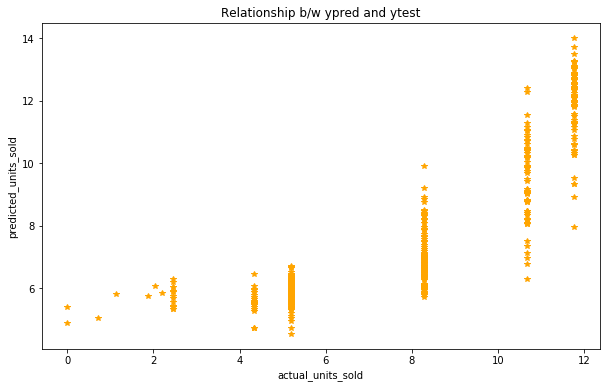

In [241]:
#Check the relationship b/w ypredict and ytest
plt.plot(ytest,ypred_ols,'*',color='orange')
plt.title('Relationship b/w ypred and ytest')
plt.xlabel('actual_units_sold')
plt.ylabel('predicted_units_sold')
plt.show()


In [242]:
#Statistical test to check the linearity
from statsmodels.stats.diagnostic import linear_rainbow 
print('% of Linearity:',linear_rainbow(res=linear_model_using_ols,frac=0.5)[1]*100)

% of Linearity: 15.97983321576278


Interpretation:
    Linearity assumption also satisfied.

#### 5.1.d) Normality

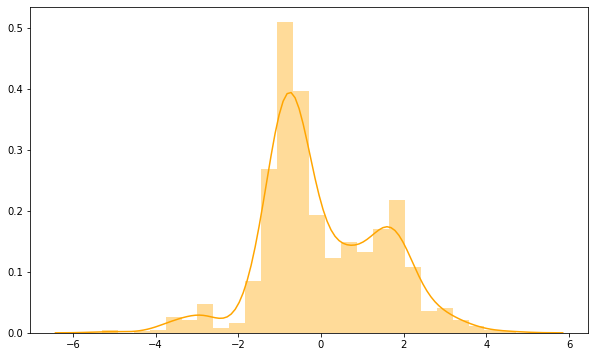

In [243]:
#plot the distribution of residual
sns.distplot(linear_model_using_ols.resid,color='orange')
plt.show()

In [244]:
#Check skewness
print('Skewness of residual is :',linear_model_using_ols.resid.skew())

Skewness of residual is : 0.16745034858170932


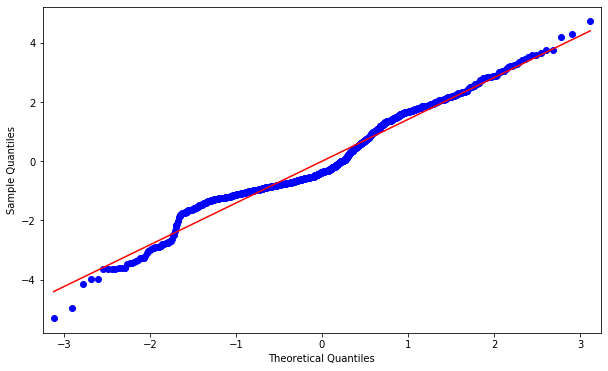

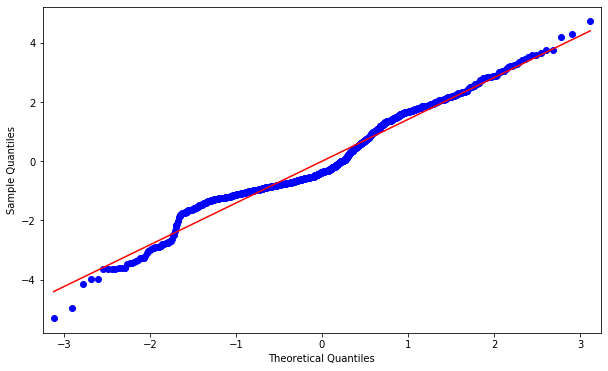

In [245]:
#Using qqplot
from statsmodels.graphics.gofplots import qqplot
qqplot(linear_model_using_ols.resid,line='r')   #r=regression line
#check

Interpretation:
    From the above graphs we can say that residual are  not normal distributed.

#### 5.1.e) Homscadasticity

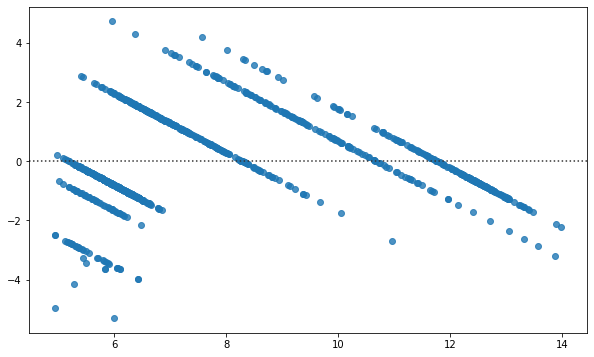

In [246]:
#Find the Homascadasticity
sns.residplot(linear_model_using_ols.predict(),linear_model_using_ols.resid)
plt.show()

In [247]:
#statsitic test for homascadsticity
from statsmodels.stats.api import het_goldfeldquandt

#H0: model is homascadsticity
print('Pvalue is :',het_goldfeldquandt(linear_model_using_ols.resid,linear_model_using_ols.model.exog)[1])

Pvalue is : 0.07905382510095603


Interpretation:
In the above graph there is no funnel shape and eventhough pvalue is greater than 0.05 so, this model is free of Heteroscadsticity.
    

Interpretation:
    
    All assumptions are satisfied.

### 6) Feature selection


In [248]:
inpv1.head(2)

,price,retail_price,uses_ad_boosts,rating,rating_five_count,rating_one_count,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,merchant_rating_count,merchant_rating,product_color,product_variation_size_id,origin_country_CN,origin_country_GB,origin_country_SG,origin_country_US,origin_country_VE
121,-0.337599,-0.741244,-0.873758,1.088421,-0.798195,-0.825791,0.792577,-0.318661,0.0,0.431540,0.0,-0.319513,-0.421815,-1.219513,-0.222807,1,0,0,0,0
1026,1.075643,1.937483,-0.873758,-0.562040,-0.722611,-0.635248,0.792577,0.892096,0.0,0.758468,0.0,-0.598805,-0.171088,1.229477,-0.222807,1,0,0,0,0


In [249]:
inpv_1=inpv1.copy()

In [250]:
#import library
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

#### 6.1.a) Backward elimination method

In [251]:
lr=LinearRegression()
lr_back=sfs(estimator=lr,k_features='best',forward=False) #k_features='best' gives significant features among all the features
sfs_back=lr_back.fit(inpv_1,ytrain)
back_feat=sfs_back.k_feature_names_
back_feat=list(back_feat)
print('These are the significant features for best model by considering backward_elimin :','\n',back_feat)

These are the significant features for best model by considering backward_elimin : 
 ['price', 'retail_price', 'uses_ad_boosts', 'rating_five_count', 'rating_one_count', 'product_variation_inventory', 'shipping_is_express', 'inventory_total', 'merchant_rating_count', 'product_color', 'product_variation_size_id', 'origin_country_CN', 'origin_country_GB', 'origin_country_US']


In [252]:
#Check score
print('Score of backward elimination :',sfs_back.k_score_)

Score of backward elimination : 0.7439649182100647


#### 6.1.b) Forward selection method

In [253]:
lr=LinearRegression()
lr_forw=sfs(estimator=lr,k_features='best',forward=True)   
sfs_forw=lr_forw.fit(inpv_1,ytrain)
forw_feat=sfs_forw.k_feature_names_
forw_feat=list(forw_feat)
print('These are the significant features for best model by considering forward_selec :','\n',forw_feat)

These are the significant features for best model by considering forward_selec : 
 ['price', 'retail_price', 'uses_ad_boosts', 'rating_five_count', 'rating_one_count', 'product_variation_inventory', 'shipping_is_express', 'merchant_rating_count', 'product_color', 'product_variation_size_id', 'origin_country_GB', 'origin_country_SG', 'origin_country_VE']


In [254]:
#Check score
print('Score of forward selection :',sfs_forw.k_score_)

Score of forward selection : 0.7440194606516825


#### 6.1.c) RFE-Recursive feature elimination

In [255]:
lr=LinearRegression()
from sklearn.feature_selection import RFECV       #its gives possible features so thats why we dont need to write n_features_to_select
rfe_mod=RFECV(estimator=lr)
rfe_feat=rfe_mod.fit(inpv_1,ytrain)

rank=pd.DataFrame()
rank['Rank']=rfe_feat.ranking_
rank['Feature']=inpv_1.columns

r_feat=rank[rank['Rank']==1]

In [256]:
#print features
rfe_featu=r_feat['Feature']
print('These are the significant features for best model by considering RFE :','\n',rfe_featu)

These are the significant features for best model by considering RFE : 
 0                           price
1                    retail_price
2                  uses_ad_boosts
3                          rating
4               rating_five_count
5                rating_one_count
6     product_variation_inventory
7           shipping_option_price
9            countries_shipped_to
11          merchant_rating_count
12                merchant_rating
13                  product_color
14      product_variation_size_id
15              origin_country_CN
17              origin_country_SG
18              origin_country_US
19              origin_country_VE
Name: Feature, dtype: object


In [257]:
#Check score
print('Score of RFECV method :',np.mean(rfe_feat.grid_scores_))

Score of RFECV method : 0.7369392439316312


Interpretation:

    From the above three results forward and backward methos are giving best result so, conisder any one method to build a model(RFECV gives less score).

In [258]:
#model-5 model with best features using backward elimination


In [259]:
import statsmodels.api as sm

inpc2=sm.add_constant(inpv_1[back_feat])
ols=sm.OLS(ytrain,inpc2)
linear_model_using_ols_best_feat=ols.fit() 
print(linear_model_using_ols_best_feat.summary())

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     294.9
Date:                Sun, 27 Sep 2020   Prob (F-statistic):          3.02e-317
Time:                        11:56:53   Log-Likelihood:                -1958.5
No. Observations:                1101   AIC:                             3941.
Df Residuals:                    1089   BIC:                             4001.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [260]:
sign_feat=list(inpv_1[back_feat].columns)  #bcoz we need to consider only best features obtained from backward elimination


from statsmodels.api import add_constant
xtest_with_constant=add_constant(xtest[sign_feat],has_constant='add')
ypred_ols=linear_model_using_ols_best_feat.predict(xtest_with_constant)
ypred_ols.shape

(472,)

In [261]:
#find Performance
from sklearn.metrics import r2_score,mean_squared_error
from statsmodels.tools.eval_measures import rmse

#rmse
ols_rmse=np.sqrt(mean_squared_error(ytest,ypred_ols))
#r2_score
ols_r2=r2_score(ytest,ypred_ols)
#adj_r2_score
ols_adj_r2=1-(((1-ols_r2)*(len(xtest[sign_feat])-1))/(len(xtest[sign_feat])-len(xtest[sign_feat].columns)-1))

print('rmse:',ols_rmse,'\n','r2_score:',ols_r2,'\n','adj_r2:',ols_adj_r2)

rmse: 1.4917858508927995 
 r2_score: 0.7404016030415966 
 adj_r2: 0.7324489169203326


In [262]:
linreg_model_with_signifi_feat_using_backward_elimin = pd.Series({
                     'Model_Name': "LRM_signif_feat_using_backward_elimin",
                     'RMSE':ols_rmse,
                     'R-Squared':ols_r2 ,
                     'Adj. R-Squared': ols_adj_r2     
                   })

score_card = score_card.append(linreg_model_with_signifi_feat_using_backward_elimin, ignore_index=True)

#call scorecard
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,LRM_using _OLS,0.882768,0.876474,1311.38
1,LRM_using_sklearn,0.882768,0.876474,1311.38
2,LRM_full_with_transformed_units_sold,0.744950,0.731256,[1.478660279511954]
3,LRM_with_Signf_feat,0.740664,0.729163,1.49103
4,LRM_signif_feat_using_backward_elimin,0.740402,0.732449,1.49179


In [263]:
#model-6 model with best features using RFE method

In [264]:
#Build a model
inpc3=sm.add_constant(inpv_1[rfe_featu])
ols=sm.OLS(ytrain,inpc3)
linear_model_using_ols_best_feat_RFE=ols.fit() 
print(linear_model_using_ols_best_feat_RFE.summary())

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     190.7
Date:                Sun, 27 Sep 2020   Prob (F-statistic):          6.63e-311
Time:                        11:57:16   Log-Likelihood:                -1956.5
No. Observations:                1101   AIC:                             3949.
Df Residuals:                    1083   BIC:                             4039.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [265]:
sign_feat=list(inpv_1[rfe_featu].columns)  #bcoz we need to consider only best features obtained from RFE method


from statsmodels.api import add_constant
xtest_with_constant=add_constant(xtest[sign_feat],has_constant='add')
ypred_ols=linear_model_using_ols_best_feat_RFE.predict(xtest_with_constant)
ypred_ols.shape

(472,)

In [266]:
#find Performance
from sklearn.metrics import r2_score,mean_squared_error
from statsmodels.tools.eval_measures import rmse

#rmse
ols_rmse=np.sqrt(mean_squared_error(ytest,ypred_ols))
#r2_score
ols_r2=r2_score(ytest,ypred_ols)
#adj_r2_score
ols_adj_r2=1-(((1-ols_r2)*(len(xtest[sign_feat])-1))/(len(xtest[sign_feat])-len(xtest[sign_feat].columns)-1))

print('rmse:',ols_rmse,'\n','r2_score:',ols_r2,'\n','adj_r2:',ols_adj_r2)

rmse: 1.491032287801294 
 r2_score: 0.7406638046995525 
 adj_r2: 0.7309529780032802


In [267]:
linreg_model_with_signifi_feat_using_RFECV_method = pd.Series({
                     'Model_Name': "LRM_with_signif_feat_using_RFECV",
                     'RMSE':ols_rmse,
                     'R-Squared':ols_r2 ,
                     'Adj. R-Squared': ols_adj_r2     
                   })

score_card = score_card.append(linreg_model_with_signifi_feat_using_RFECV_method , ignore_index=True)

#call scorecard
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,LRM_using _OLS,0.882768,0.876474,1311.38
1,LRM_using_sklearn,0.882768,0.876474,1311.38
2,LRM_full_with_transformed_units_sold,0.744950,0.731256,[1.478660279511954]
3,LRM_with_Signf_feat,0.740664,0.729163,1.49103
4,LRM_signif_feat_using_backward_elimin,0.740402,0.732449,1.49179
5,LRM_with_signif_feat_using_RFECV,0.740664,0.730953,1.49103


#### 6.2) Interaction effect  (Joint effect)

#### 6.2.a) Interaction effect with backward elimination

In [270]:
inpv_1_back=inpv_1[back_feat]
inpv_1_back.head(2)

,price,retail_price,uses_ad_boosts,rating_five_count,rating_one_count,product_variation_inventory,shipping_is_express,inventory_total,merchant_rating_count,product_color,product_variation_size_id,origin_country_CN,origin_country_GB,origin_country_US
121,-0.337599,-0.741244,-0.873758,-0.798195,-0.825791,0.792577,0.0,0.0,-0.319513,-1.219513,-0.222807,1,0,0
1026,1.075643,1.937483,-0.873758,-0.722611,-0.635248,0.792577,0.0,0.0,-0.598805,1.229477,-0.222807,1,0,0


In [271]:
##add one column--> price difference[retail_price-price]
inpv_1_back['price_diff']=inpv_1_back['retail_price']-inpv_1_back['price']

#now drop price feature
inpv_1_back.drop(columns=['price','retail_price'],inplace=True)
inpv_1_back.head(2)


,uses_ad_boosts,rating_five_count,rating_one_count,product_variation_inventory,shipping_is_express,inventory_total,merchant_rating_count,product_color,product_variation_size_id,origin_country_CN,origin_country_GB,origin_country_US,price_diff
121,-0.873758,-0.798195,-0.825791,0.792577,0.0,0.0,-0.319513,-1.219513,-0.222807,1,0,0,-0.403646
1026,-0.873758,-0.722611,-0.635248,0.792577,0.0,0.0,-0.598805,1.229477,-0.222807,1,0,0,0.861840


In [272]:
#model-7 interaction effect of price difference with backward elimination(retail_price-price)

In [273]:
#Build a model 
import statsmodels.api as sm

inpc4=sm.add_constant(inpv_1_back)
ols=sm.OLS(ytrain,inpc4)
linear_model_using_ols_best_feat_backward_with_interaction=ols.fit() 
print(linear_model_using_ols_best_feat_backward_with_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     317.1
Date:                Sun, 27 Sep 2020   Prob (F-statistic):          2.45e-314
Time:                        12:01:03   Log-Likelihood:                -1968.2
No. Observations:                1101   AIC:                             3958.
Df Residuals:                    1090   BIC:                             4013.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [278]:
#same we need for test also#check
xtest_backward=xtest[back_feat]
xtest_backward.head(2)

,price,retail_price,uses_ad_boosts,rating_five_count,rating_one_count,product_variation_inventory,shipping_is_express,inventory_total,merchant_rating_count,product_color,product_variation_size_id,origin_country_CN,origin_country_GB,origin_country_US
472,1.075643,-0.436843,1.144482,1.606753,1.765586,-0.191198,0.0,0.0,2.548950,-1.219513,-0.222807,1,0,0
952,0.227698,-0.619484,-0.873758,1.845186,1.765586,0.792577,0.0,0.0,1.395013,1.474377,-0.222807,1,0,0


In [279]:
##add one column--> price difference[retail_price-price]
xtest_backward['price_diff']=xtest_backward['retail_price']-xtest_backward['price']

#now drop price and retail price features
xtest_backward.drop(columns=['price','retail_price'],inplace=True)
xtest_backward.head(2)

,uses_ad_boosts,rating_five_count,rating_one_count,product_variation_inventory,shipping_is_express,inventory_total,merchant_rating_count,product_color,product_variation_size_id,origin_country_CN,origin_country_GB,origin_country_US,price_diff
472,1.144482,1.606753,1.765586,-0.191198,0.0,0.0,2.548950,-1.219513,-0.222807,1,0,0,-1.512487
952,-0.873758,1.845186,1.765586,0.792577,0.0,0.0,1.395013,1.474377,-0.222807,1,0,0,-0.847182


In [280]:
from statsmodels.api import add_constant
xtest_with_constant=add_constant(xtest_backward,has_constant='add')
ypred_ols=linear_model_using_ols_best_feat_backward_with_interaction.predict(xtest_with_constant)
ypred_ols.shape

(472,)

In [281]:
#find Performance
from sklearn.metrics import r2_score,mean_squared_error
from statsmodels.tools.eval_measures import rmse

#rmse
ols_rmse=np.sqrt(mean_squared_error(ytest,ypred_ols))
#r2_score
ols_r2=r2_score(ytest,ypred_ols)
#adj_r2_score
ols_adj_r2=1-(((1-ols_r2)*(len(xtest_backward)-1))/(len(xtest_backward)-len(xtest_backward.columns)-1))

print('rmse:',ols_rmse,'\n','r2_score:',ols_r2,'\n','adj_r2:',ols_adj_r2)

rmse: 1.492746112908968 
 r2_score: 0.7400672886875228 
 adj_r2: 0.7326892859646796


In [282]:
linreg_model_with_signifi_feat_backwrd_interaction = pd.Series({
                     'Model_Name': "LRM_with_signif_feat_Backwrd_Intrctn",
                     'RMSE':ols_rmse,
                     'R-Squared':ols_r2 ,
                     'Adj. R-Squared': ols_adj_r2     
                   })

score_card = score_card.append(linreg_model_with_signifi_feat_backwrd_interaction , ignore_index=True)

#call scorecard
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,LRM_using _OLS,0.882768,0.876474,1311.38
1,LRM_using_sklearn,0.882768,0.876474,1311.38
2,LRM_full_with_transformed_units_sold,0.744950,0.731256,[1.478660279511954]
3,LRM_with_Signf_feat,0.740664,0.729163,1.49103
4,LRM_signif_feat_using_backward_elimin,0.740402,0.732449,1.49179
5,LRM_with_signif_feat_using_RFECV,0.740664,0.730953,1.49103
6,LRM_with_signif_feat_Backwrd_Intrctn,0.740067,0.732689,1.49275


#### 6.2.b) Interaction effect with RFECV method

In [283]:
inpv_1_rfe=inpv_1[rfe_featu]
inpv_1_rfe.head(2)

,price,retail_price,uses_ad_boosts,rating,rating_five_count,rating_one_count,product_variation_inventory,shipping_option_price,countries_shipped_to,merchant_rating_count,merchant_rating,product_color,product_variation_size_id,origin_country_CN,origin_country_SG,origin_country_US,origin_country_VE
121,-0.337599,-0.741244,-0.873758,1.088421,-0.798195,-0.825791,0.792577,-0.318661,0.431540,-0.319513,-0.421815,-1.219513,-0.222807,1,0,0,0
1026,1.075643,1.937483,-0.873758,-0.562040,-0.722611,-0.635248,0.792577,0.892096,0.758468,-0.598805,-0.171088,1.229477,-0.222807,1,0,0,0


In [284]:
##add one column--> price difference[retail_price-price]
inpv_1_rfe['price_diff']=inpv_1_rfe['retail_price']-inpv_1_rfe['price']

#now drop price feature
inpv_1_rfe.drop(columns=['price','retail_price'],inplace=True)
inpv_1_rfe.head(2)

,uses_ad_boosts,rating,rating_five_count,rating_one_count,product_variation_inventory,shipping_option_price,countries_shipped_to,merchant_rating_count,merchant_rating,product_color,product_variation_size_id,origin_country_CN,origin_country_SG,origin_country_US,origin_country_VE,price_diff
121,-0.873758,1.088421,-0.798195,-0.825791,0.792577,-0.318661,0.431540,-0.319513,-0.421815,-1.219513,-0.222807,1,0,0,0,-0.403646
1026,-0.873758,-0.562040,-0.722611,-0.635248,0.792577,0.892096,0.758468,-0.598805,-0.171088,1.229477,-0.222807,1,0,0,0,0.861840


In [ ]:
#model-8 interaction effect of price difference with rfe method(retail_price-price)

In [285]:
#Build a model 
import statsmodels.api as sm

inpc5=sm.add_constant(inpv_1_rfe)
ols=sm.OLS(ytrain,inpc5)
linear_model_using_ols_best_feat_RFECV_with_interaction=ols.fit() 
print(linear_model_using_ols_best_feat_RFECV_with_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     198.9
Date:                Sun, 27 Sep 2020   Prob (F-statistic):          1.10e-308
Time:                        12:03:31   Log-Likelihood:                -1964.4
No. Observations:                1101   AIC:                             3963.
Df Residuals:                    1084   BIC:                             4048.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [287]:
#same we need for test also
xtest_rfe=xtest[rfe_featu]
xtest_rfe.head(2)

,price,retail_price,uses_ad_boosts,rating,rating_five_count,rating_one_count,product_variation_inventory,shipping_option_price,countries_shipped_to,merchant_rating_count,merchant_rating,product_color,product_variation_size_id,origin_country_CN,origin_country_SG,origin_country_US,origin_country_VE
472,1.075643,-0.436843,1.144482,-0.435081,1.606753,1.765586,-0.191198,0.892096,-0.113341,2.548950,0.554360,-1.219513,-0.222807,1,0,0,0
952,0.227698,-0.619484,-0.873758,0.047361,1.845186,1.765586,0.792577,0.892096,1.739252,1.395013,1.501754,1.474377,-0.222807,1,0,0,0


In [288]:
##add one column--> price difference[retail_price-price]
xtest_rfe['price_diff']=xtest_rfe['retail_price']-xtest_rfe['price']

#now drop price and retail price features
xtest_rfe.drop(columns=['price','retail_price'],inplace=True)
xtest_rfe.head(2)

,uses_ad_boosts,rating,rating_five_count,rating_one_count,product_variation_inventory,shipping_option_price,countries_shipped_to,merchant_rating_count,merchant_rating,product_color,product_variation_size_id,origin_country_CN,origin_country_SG,origin_country_US,origin_country_VE,price_diff
472,1.144482,-0.435081,1.606753,1.765586,-0.191198,0.892096,-0.113341,2.548950,0.554360,-1.219513,-0.222807,1,0,0,0,-1.512487
952,-0.873758,0.047361,1.845186,1.765586,0.792577,0.892096,1.739252,1.395013,1.501754,1.474377,-0.222807,1,0,0,0,-0.847182


In [289]:
from statsmodels.api import add_constant
xtest_with_constant=add_constant(xtest_rfe,has_constant='add')
ypred_ols=linear_model_using_ols_best_feat_RFECV_with_interaction.predict(xtest_with_constant)
ypred_ols.shape

(472,)

In [290]:
#find Performance
from sklearn.metrics import r2_score,mean_squared_error
from statsmodels.tools.eval_measures import rmse

#rmse
ols_rmse=np.sqrt(mean_squared_error(ytest,ypred_ols))
#r2_score
ols_r2=r2_score(ytest,ypred_ols)
#adj_r2_score
ols_adj_r2=1-(((1-ols_r2)*(len(xtest_backward)-1))/(len(xtest_backward)-len(xtest_backward.columns)-1))

print('rmse:',ols_rmse,'\n','r2_score:',ols_r2,'\n','adj_r2:',ols_adj_r2)

rmse: 1.4859136495407745 
 r2_score: 0.7424413244102968 
 adj_r2: 0.7351307069808948


In [291]:
linreg_model_with_signifi_feat_RFECV_interaction = pd.Series({
                     'Model_Name': "LRM_with_signif_feat_RFECV_intrctn",
                     'RMSE':ols_rmse,
                     'R-Squared':ols_r2 ,
                     'Adj. R-Squared': ols_adj_r2     
                   })

score_card = score_card.append(linreg_model_with_signifi_feat_RFECV_interaction , ignore_index=True)

#call scorecard
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,LRM_using _OLS,0.882768,0.876474,1311.38
1,LRM_using_sklearn,0.882768,0.876474,1311.38
2,LRM_full_with_transformed_units_sold,0.744950,0.731256,[1.478660279511954]
3,LRM_with_Signf_feat,0.740664,0.729163,1.49103
4,LRM_signif_feat_using_backward_elimin,0.740402,0.732449,1.49179
5,LRM_with_signif_feat_using_RFECV,0.740664,0.730953,1.49103
6,LRM_with_signif_feat_Backwrd_Intrctn,0.740067,0.732689,1.49275
7,LRM_with_signif_feat_RFECV_intrctn,0.742441,0.735131,1.48591


### 7) Optimisation

We need to check whether this dataset is overfitted or not.. For this we can use cross validation.

#### 7.1.a) Cross Validation

In [292]:
inp=final_data
out=box_out

In [293]:
#import library
from sklearn.model_selection import cross_val_score,KFold

kf=KFold(n_splits=5,shuffle=True,random_state=48)


#use r2 score
from sklearn.linear_model import LinearRegression     #split the dataset into 5 groups
lr=LinearRegression()
res=cross_val_score(lr,inp,out,cv=kf,scoring='r2')
print('R2 values for 5sets of dataset :',res ) 

R2 values for 5sets of dataset : [0.74746546 0.73647521 0.76380298 0.75171366 0.72539857]


In [294]:
#bias error
be=1-np.mean(res)

#variance error
ve=np.std(res)

print('Bias error interms of R2:',be)
print('Varaince error interms of R2:',ve)      #std(res)=0 model if free of overfitting 

Bias error interms of R2: 0.2550288250754409
Varaince error interms of R2: 0.013126977941027572


Interpretation:
    
    All r2 values are not equal and even variance is also not equal to zero.. so, overfitting problem is presence in this dataset.

In [295]:
# Dataset is having overfitting problem... to overcome this we can use regualarization 

#### 7.2) Regularization with Hyperparameter

In [296]:
#import hyperparameter library
from sklearn.model_selection import GridSearchCV 
#import regularization library
from sklearn.linear_model import Lasso,Ridge,ElasticNet

#### 7.2.a) Lasso Regularization

In [297]:
loss=Lasso()     #hyper paramater of lasso is alpha
param={'alpha':[0.000001,0.00001,0.0001,0.001,0.01,0.1,1,2,5,8,10,50,60,70,90,100]}

grid=GridSearchCV(loss,param_grid=param,cv=5,scoring='r2') 

hyp_rid=grid.fit(inpv_1_rfe,ytrain)

print('Best hyperparameter is :',hyp_rid.best_params_ )
print('Score :',hyp_rid.best_score_ )

Best hyperparameter is : {'alpha': 0.01}
Score : 0.7388471927618434


#### 7.2.b) Ridge Regularization

In [298]:
rid=Ridge()     #hyper paramater of ridge is alpha
param={'alpha':[0.000001,0.00001,0.0001,0.001,0.01,0.1,1,2,5,8,10,50,60,70,90,100]}

grid=GridSearchCV(rid,param_grid=param,cv=5,scoring='r2')

hyp_rid=grid.fit(inpv_1_rfe,ytrain)

print('Best hyperparameter is :',hyp_rid.best_params_ )
print('Score :',hyp_rid.best_score_ )


Best hyperparameter is : {'alpha': 1}
Score : 0.7385545831338304


#### 7.3.c) ElasticNet Regularization

In [299]:
enet=ElasticNet()     #hyper paramater of elastic  is alpha and l1_ratio
param={'alpha':[0.000001,0.00001,0.0001,0.001,0.01,0.1,1,2,5,8,10,50,60,70,90,100],'l1_ratio':[0.1,.2,0.3,0.4,.5,0.6,0.7,0.8,0.9]}

grid=GridSearchCV(enet,param_grid=param,cv=5,scoring='r2')

hyp_rid=grid.fit(inpv_1_rfe,ytrain)

print('Best hyperparameter is :',hyp_rid.best_params_ )
print('Score :',hyp_rid.best_score_ )

Best hyperparameter is : {'alpha': 0.01, 'l1_ratio': 0.9}
Score : 0.7388363450180849


Interpretation:
   
   From the above three outputs Ridge and ElasticNet regularization giving best score so, consider anyone regularization.. [Ridge Regularization for the further model building.]

In [ ]:
#model-9  building a model using Ridge regularization

In [300]:
rid=Ridge(alpha=1)                 
rid.fit(inpv_1_rfe,ytrain)

ypred_train=rid.predict(inpv_1_rfe)
ypred_test=rid.predict(xtest_rfe)

rmse_train=np.sqrt(mean_squared_error(ytrain,ypred_train))
rmse_test=np.sqrt(mean_squared_error(ytest,ypred_test))

r2_train=r2_score(ytrain,ypred_train)
r2_test=r2_score(ytest,ypred_test)

adj_r2_train=1-(((1-r2_train)*(len(inpv_1_rfe)-1))/(len(inpv_1_rfe)-len(inpv_1_rfe.columns)-1))
adj_r2_test=1-(((1-r2_test)*(len(xtest_rfe)-1))/(len(xtest_rfe)-len(xtest_rfe.columns)-1))

print('rmse_train:',rmse_train,'\n','rmse_test:',rmse_test,'\n','r2_score_train:',r2_train,'\n','r2_score_test:',r2_test,'\n','adj_r2_train:',adj_r2_train,'\n','adj_r2_test:',adj_r2_test)

rmse_train: 1.4409306989391923 
 rmse_test: 1.4853857053472381 
 r2_score_train: 0.7459226957670159 
 r2_score_test: 0.7426243127705053 
 adj_r2_train: 0.7421724772543519 
 adj_r2_test: 0.733573739153644


In [301]:
linreg_model_with_signifi_feat_RFECV_interaction_ridge = pd.Series({
                     'Model_Name': "LRM_with_signif_feat_RFECV_interctn_Ridge",
                     'RMSE':rmse_test,
                     'R-Squared':r2_test ,
                     'Adj. R-Squared': adj_r2_test     
                   })

score_card = score_card.append(linreg_model_with_signifi_feat_RFECV_interaction_ridge , ignore_index=True)

#call scorecard
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,LRM_using _OLS,0.882768,0.876474,1311.38
1,LRM_using_sklearn,0.882768,0.876474,1311.38
2,LRM_full_with_transformed_units_sold,0.744950,0.731256,[1.478660279511954]
3,LRM_with_Signf_feat,0.740664,0.729163,1.49103
4,LRM_signif_feat_using_backward_elimin,0.740402,0.732449,1.49179
5,LRM_with_signif_feat_using_RFECV,0.740664,0.730953,1.49103
6,LRM_with_signif_feat_Backwrd_Intrctn,0.740067,0.732689,1.49275
7,LRM_with_signif_feat_RFECV_intrctn,0.742441,0.735131,1.48591
8,LRM_with_signif_feat_RFECV_interctn_Ridge,0.742624,0.733574,1.48539


In [302]:
#model-10  building a model using Lasso regularization

In [303]:
las=Lasso(alpha=0.01)                 
las.fit(inpv_1_rfe,ytrain)

ypred_train=las.predict(inpv_1_rfe)
ypred_test=las.predict(xtest_rfe)

rmse_train=np.sqrt(mean_squared_error(ytrain,ypred_train))
rmse_test=np.sqrt(mean_squared_error(ytest,ypred_test))

r2_train=r2_score(ytrain,ypred_train)
r2_test=r2_score(ytest,ypred_test)

adj_r2_train=1-(((1-r2_train)*(len(inpv_1_rfe)-1))/(len(inpv_1_rfe)-len(inpv_1_rfe.columns)-1))
adj_r2_test=1-(((1-r2_test)*(len(xtest_rfe)-1))/(len(xtest_rfe)-len(xtest_rfe.columns)-1))

print('rmse_train:',rmse_train,'\n','rmse_test:',rmse_test,'\n','r2_score_train:',r2_train,'\n','r2_score_test:',r2_test,'\n','adj_r2_train:',adj_r2_train,'\n','adj_r2_test:',adj_r2_test)

rmse_train: 1.442012135045865 
 rmse_test: 1.4897755965838269 
 r2_score_train: 0.7455411764067902 
 r2_score_test: 0.7411007746829759 
 adj_r2_train: 0.7417853266120564 
 adj_r2_test: 0.7319966261003992


In [304]:
linreg_model_with_signifi_feat_RFECV_interaction_Lasso = pd.Series({
                     'Model_Name': "LRM_with_signif_feat_RFECV_interctn_Lasso",
                     'RMSE':rmse_test,
                     'R-Squared':r2_test ,
                     'Adj. R-Squared': adj_r2_test     
                   })

score_card = score_card.append(linreg_model_with_signifi_feat_RFECV_interaction_Lasso , ignore_index=True)

#call scorecard
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,LRM_using _OLS,0.882768,0.876474,1311.38
1,LRM_using_sklearn,0.882768,0.876474,1311.38
2,LRM_full_with_transformed_units_sold,0.744950,0.731256,[1.478660279511954]
3,LRM_with_Signf_feat,0.740664,0.729163,1.49103
4,LRM_signif_feat_using_backward_elimin,0.740402,0.732449,1.49179
5,LRM_with_signif_feat_using_RFECV,0.740664,0.730953,1.49103
6,LRM_with_signif_feat_Backwrd_Intrctn,0.740067,0.732689,1.49275
7,LRM_with_signif_feat_RFECV_intrctn,0.742441,0.735131,1.48591
8,LRM_with_signif_feat_RFECV_interctn_Ridge,0.742624,0.733574,1.48539
9,LRM_with_signif_feat_RFECV_interctn_Lasso,0.741101,0.731997,1.48978


In [305]:
#print coeffiecents
feat_from_lasso=pd.DataFrame()
feat_from_lasso['features']=inpv_1_rfe.columns
feat_from_lasso['ceof_values']=las.coef_
feat_from_lasso


,features,ceof_values
0,uses_ad_boosts,0.115898
1,rating,-0.025833
2,rating_five_count,1.407353
3,rating_one_count,1.040444
4,product_variation_inventory,0.170973
5,shipping_option_price,-0.099481
6,countries_shipped_to,0.038263
7,merchant_rating_count,0.071160
8,merchant_rating,0.008630
9,product_color,0.074365


#### 7.3) Stochastic Gradient Descent

In [307]:
#import library
from sklearn.linear_model import SGDRegressor

In [308]:
sgd=SGDRegressor()
sgd.fit(inpv_1_rfe,ytrain)


ypred_train=sgd.predict(inpv_1_rfe)
ypred_test=sgd.predict(xtest_rfe)

rmse_train=np.sqrt(mean_squared_error(ytrain,ypred_train))
rmse_test=np.sqrt(mean_squared_error(ytest,ypred_test))

r2_train=r2_score(ytrain,ypred_train)
r2_test=r2_score(ytest,ypred_test)

adj_r2_train=1-(((1-r2_train)*(len(inpv_1_rfe)-1))/(len(inpv_1_rfe)-len(inpv_1_rfe.columns)-1))
adj_r2_test=1-(((1-r2_test)*(len(xtest_rfe)-1))/(len(xtest_rfe)-len(xtest_rfe.columns)-1))

print('rmse_train:',rmse_train,'\n','rmse_test:',rmse_test,'\n','r2_score_train:',r2_train,'\n','r2_score_test:',r2_test,'\n','adj_r2_train:',adj_r2_train,'\n','adj_r2_test:',adj_r2_test)

rmse_train: 1.4505553398462363 
 rmse_test: 1.5009595497584929 
 r2_score_train: 0.7425171609908165 
 r2_score_test: 0.7371989986788101 
 adj_r2_train: 0.738716676282194 
 adj_r2_test: 0.7279576447861968


In [309]:
linreg_model_with_signifi_feat_RFECV_interaction_sgd = pd.Series({
                     'Model_Name': "LRM_with_signif_feat_RFECV_intrctn_SGD",
                     'RMSE':rmse_test,
                     'R-Squared':r2_test ,
                     'Adj. R-Squared': adj_r2_test     
                   })

score_card = score_card.append(linreg_model_with_signifi_feat_RFECV_interaction_sgd  , ignore_index=True)

#call scorecard
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,LRM_using _OLS,0.882768,0.876474,1311.38
1,LRM_using_sklearn,0.882768,0.876474,1311.38
2,LRM_full_with_transformed_units_sold,0.744950,0.731256,[1.478660279511954]
3,LRM_with_Signf_feat,0.740664,0.729163,1.49103
4,LRM_signif_feat_using_backward_elimin,0.740402,0.732449,1.49179
5,LRM_with_signif_feat_using_RFECV,0.740664,0.730953,1.49103
6,LRM_with_signif_feat_Backwrd_Intrctn,0.740067,0.732689,1.49275
7,LRM_with_signif_feat_RFECV_intrctn,0.742441,0.735131,1.48591
8,LRM_with_signif_feat_RFECV_interctn_Ridge,0.742624,0.733574,1.48539
9,LRM_with_signif_feat_RFECV_interctn_Lasso,0.741101,0.731997,1.48978


In [310]:
feat_from_sgd=pd.DataFrame()
feat_from_sgd['features']=inpv_1_rfe.columns
feat_from_sgd['coef_values']=sgd.coef_
feat_from_sgd

,features,coef_values
0,uses_ad_boosts,0.130349
1,rating,-0.035102
2,rating_five_count,1.402632
3,rating_one_count,1.047951
4,product_variation_inventory,0.186959
5,shipping_option_price,-0.118844
6,countries_shipped_to,0.044571
7,merchant_rating_count,0.059799
8,merchant_rating,0.012944
9,product_color,0.088512


#### 7.4) SVM Algorithm

In [311]:
from sklearn import svm
svrlin = svm.SVR(kernel = 'linear')    # by default kernel=rbg used for classification so change to linear for regression
svrlin.fit(inpv_1_rfe,ytrain)


ypred_train=svrlin.predict(inpv_1_rfe)
ypred_test=svrlin.predict(xtest_rfe)

rmse_train=np.sqrt(mean_squared_error(ytrain,ypred_train))
rmse_test=np.sqrt(mean_squared_error(ytest,ypred_test))

r2_train=r2_score(ytrain,ypred_train)
r2_test=r2_score(ytest,ypred_test)

adj_r2_train=1-(((1-r2_train)*(len(inpv_1_rfe)-1))/(len(inpv_1_rfe)-len(inpv_1_rfe.columns)-1))
adj_r2_test=1-(((1-r2_test)*(len(xtest_rfe)-1))/(len(xtest_rfe)-len(xtest_rfe.columns)-1))

print('rmse_train:',rmse_train,'\n','rmse_test:',rmse_test,'\n','r2_score_train:',r2_train,'\n','r2_score_test:',r2_test,'\n','adj_r2_train:',adj_r2_train,'\n','adj_r2_test:',adj_r2_test)




rmse_train: 1.5578085531072579 
 rmse_test: 1.5917702677161976 
 r2_score_train: 0.7030332317790966 
 r2_score_test: 0.7044371703972141 
 adj_r2_train: 0.6986499584474228 
 adj_r2_test: 0.6940437522133798


In [312]:
linreg_model_with_signifi_feat_RFECV_interaction_SVM = pd.Series({
                     'Model_Name': "LRM_with_signif_feat_RFECV_intrctn_SVM",
                     'RMSE':rmse_test,
                     'R-Squared':r2_test ,
                     'Adj. R-Squared': adj_r2_test     
                   })

score_card = score_card.append(linreg_model_with_signifi_feat_RFECV_interaction_SVM  , ignore_index=True)

#call scorecard
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,LRM_using _OLS,0.882768,0.876474,1311.38
1,LRM_using_sklearn,0.882768,0.876474,1311.38
2,LRM_full_with_transformed_units_sold,0.744950,0.731256,[1.478660279511954]
3,LRM_with_Signf_feat,0.740664,0.729163,1.49103
4,LRM_signif_feat_using_backward_elimin,0.740402,0.732449,1.49179
5,LRM_with_signif_feat_using_RFECV,0.740664,0.730953,1.49103
6,LRM_with_signif_feat_Backwrd_Intrctn,0.740067,0.732689,1.49275
7,LRM_with_signif_feat_RFECV_intrctn,0.742441,0.735131,1.48591
8,LRM_with_signif_feat_RFECV_interctn_Ridge,0.742624,0.733574,1.48539
9,LRM_with_signif_feat_RFECV_interctn_Lasso,0.741101,0.731997,1.48978


In [313]:
feat_from_SVM=pd.DataFrame()
feat_from_SVM['features']=inpv_1_rfe.columns
feat_from_SVM['coef_values']=svrlin.coef_.T   #because it gives list of list so used Transform
feat_from_SVM

,features,coef_values
0,uses_ad_boosts,0.030063
1,rating,0.012505
2,rating_five_count,1.553233
3,rating_one_count,0.988726
4,product_variation_inventory,0.065293
5,shipping_option_price,-0.010227
6,countries_shipped_to,0.009039
7,merchant_rating_count,0.034135
8,merchant_rating,-0.002701
9,product_color,0.047804


In [314]:
coef=svrlin.coef_
coef.shape

(1, 16)

In [315]:
coef.T.shape

(16, 1)

In [316]:
inpv_1_rfe.columns.shape

(16,)

#### 7.5) Automatic Relevance Determination Regression (ARD) Algorithm

In [317]:
from sklearn.linear_model import ARDRegression

In [318]:
model=ARDRegression()
model.fit(inpv_1_rfe,ytrain)

ARDRegression(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
              fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
              normalize=False, threshold_lambda=10000.0, tol=0.001,
              verbose=False)

In [319]:
ypred_train=model.predict(inpv_1_rfe)
ypred_test=model.predict(xtest_rfe)

rmse_train=np.sqrt(mean_squared_error(ytrain,ypred_train))
rmse_test=np.sqrt(mean_squared_error(ytest,ypred_test))

r2_train=r2_score(ytrain,ypred_train)
r2_test=r2_score(ytest,ypred_test)

adj_r2_train=1-(((1-r2_train)*(len(inpv_1_rfe)-1))/(len(inpv_1_rfe)-len(inpv_1_rfe.columns)-1))
adj_r2_test=1-(((1-r2_test)*(len(xtest_rfe)-1))/(len(xtest_rfe)-len(xtest_rfe.columns)-1))

print('rmse_train:',rmse_train,'\n','rmse_test:',rmse_test,'\n','r2_score_train:',r2_train,'\n','r2_score_test:',r2_test,'\n','adj_r2_train:',adj_r2_train,'\n','adj_r2_test:',adj_r2_test)

rmse_train: 1.443608183393195 
 rmse_test: 1.493010437728995 
 r2_score_train: 0.7449775842834359 
 r2_score_test: 0.739975226481384 
 adj_r2_train: 0.7412134157857744 
 adj_r2_test: 0.7308314981818282


In [320]:
linreg_model_with_signifi_feat_RFECV_interaction_ARD = pd.Series({
                     'Model_Name': "LRM_with_signif_feat_RFECV_intrctn_ARD",
                     'RMSE':rmse_test,
                     'R-Squared':r2_test ,
                     'Adj. R-Squared': adj_r2_test     
                   })

score_card = score_card.append(linreg_model_with_signifi_feat_RFECV_interaction_ARD  , ignore_index=True)

#call scorecard
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,LRM_using _OLS,0.882768,0.876474,1311.38
1,LRM_using_sklearn,0.882768,0.876474,1311.38
2,LRM_full_with_transformed_units_sold,0.744950,0.731256,[1.478660279511954]
3,LRM_with_Signf_feat,0.740664,0.729163,1.49103
4,LRM_signif_feat_using_backward_elimin,0.740402,0.732449,1.49179
5,LRM_with_signif_feat_using_RFECV,0.740664,0.730953,1.49103
6,LRM_with_signif_feat_Backwrd_Intrctn,0.740067,0.732689,1.49275
7,LRM_with_signif_feat_RFECV_intrctn,0.742441,0.735131,1.48591
8,LRM_with_signif_feat_RFECV_interctn_Ridge,0.742624,0.733574,1.48539
9,LRM_with_signif_feat_RFECV_interctn_Lasso,0.741101,0.731997,1.48978


#### 7.5) Bayesian Ridge Regression Algorithm

In [321]:
from sklearn.linear_model import BayesianRidge

In [322]:
model=BayesianRidge()
model.fit(inpv_1_rfe,ytrain)

ypred_train=model.predict(inpv_1_rfe)
ypred_test=model.predict(xtest_rfe)

rmse_train=np.sqrt(mean_squared_error(ytrain,ypred_train))
rmse_test=np.sqrt(mean_squared_error(ytest,ypred_test))

r2_train=r2_score(ytrain,ypred_train)
r2_test=r2_score(ytest,ypred_test)

adj_r2_train=1-(((1-r2_train)*(len(inpv_1_rfe)-1))/(len(inpv_1_rfe)-len(inpv_1_rfe.columns)-1))
adj_r2_test=1-(((1-r2_test)*(len(xtest_rfe)-1))/(len(xtest_rfe)-len(xtest_rfe.columns)-1))

print('rmse_train:',rmse_train,'\n','rmse_test:',rmse_test,'\n','r2_score_train:',r2_train,'\n','r2_score_test:',r2_test,'\n','adj_r2_train:',adj_r2_train,'\n','adj_r2_test:',adj_r2_test)

rmse_train: 1.4412946659947345 
 rmse_test: 1.4866774569027748 
 r2_score_train: 0.7457943239477839 
 r2_score_test: 0.7421764694852968 
 adj_r2_train: 0.7420422106481201 
 adj_r2_test: 0.7331101475331314


In [323]:
linreg_model_with_signifi_feat_RFECV_interaction_BR = pd.Series({
                     'Model_Name': "LRM_with_signif_feat_RFECV_intrctn_BR",
                     'RMSE':rmse_test,
                     'R-Squared':r2_test ,
                     'Adj. R-Squared': adj_r2_test     
                   })

score_card = score_card.append(linreg_model_with_signifi_feat_RFECV_interaction_BR  , ignore_index=True)

#call scorecard
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,LRM_using _OLS,0.882768,0.876474,1311.38
1,LRM_using_sklearn,0.882768,0.876474,1311.38
2,LRM_full_with_transformed_units_sold,0.744950,0.731256,[1.478660279511954]
3,LRM_with_Signf_feat,0.740664,0.729163,1.49103
4,LRM_signif_feat_using_backward_elimin,0.740402,0.732449,1.49179
5,LRM_with_signif_feat_using_RFECV,0.740664,0.730953,1.49103
6,LRM_with_signif_feat_Backwrd_Intrctn,0.740067,0.732689,1.49275
7,LRM_with_signif_feat_RFECV_intrctn,0.742441,0.735131,1.48591
8,LRM_with_signif_feat_RFECV_interctn_Ridge,0.742624,0.733574,1.48539
9,LRM_with_signif_feat_RFECV_interctn_Lasso,0.741101,0.731997,1.48978


#### 7.6) Passive Aggressive Algorithms

In [324]:
from sklearn.linear_model import PassiveAggressiveRegressor

In [325]:
model=PassiveAggressiveRegressor()
model.fit(inpv_1_rfe,ytrain)

ypred_train=model.predict(inpv_1_rfe)
ypred_test=model.predict(xtest_rfe)

rmse_train=np.sqrt(mean_squared_error(ytrain,ypred_train))
rmse_test=np.sqrt(mean_squared_error(ytest,ypred_test))

r2_train=r2_score(ytrain,ypred_train)
r2_test=r2_score(ytest,ypred_test)

adj_r2_train=1-(((1-r2_train)*(len(inpv_1_rfe)-1))/(len(inpv_1_rfe)-len(inpv_1_rfe.columns)-1))
adj_r2_test=1-(((1-r2_test)*(len(xtest_rfe)-1))/(len(xtest_rfe)-len(xtest_rfe.columns)-1))

print('rmse_train:',rmse_train,'\n','rmse_test:',rmse_test,'\n','r2_score_train:',r2_train,'\n','r2_score_test:',r2_test,'\n','adj_r2_train:',adj_r2_train,'\n','adj_r2_test:',adj_r2_test)

rmse_train: 1.589788493761309 
 rmse_test: 1.6237417593124992 
 r2_score_train: 0.6907153376402411 
 r2_score_test: 0.6924448816840213 
 adj_r2_train: 0.6861502503729384 
 adj_r2_test: 0.6816297566443386


In [326]:
linreg_model_with_signifi_feat_RFECV_interaction_PAR = pd.Series({
                     'Model_Name': "LRM_with_signif_feat_RFECV_intrctn_PAR",
                     'RMSE':rmse_test,
                     'R-Squared':r2_test ,
                     'Adj. R-Squared': adj_r2_test     
                   })

score_card = score_card.append(linreg_model_with_signifi_feat_RFECV_interaction_PAR  , ignore_index=True)

#call scorecard
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,LRM_using _OLS,0.882768,0.876474,1311.38
1,LRM_using_sklearn,0.882768,0.876474,1311.38
2,LRM_full_with_transformed_units_sold,0.744950,0.731256,[1.478660279511954]
3,LRM_with_Signf_feat,0.740664,0.729163,1.49103
4,LRM_signif_feat_using_backward_elimin,0.740402,0.732449,1.49179
5,LRM_with_signif_feat_using_RFECV,0.740664,0.730953,1.49103
6,LRM_with_signif_feat_Backwrd_Intrctn,0.740067,0.732689,1.49275
7,LRM_with_signif_feat_RFECV_intrctn,0.742441,0.735131,1.48591
8,LRM_with_signif_feat_RFECV_interctn_Ridge,0.742624,0.733574,1.48539
9,LRM_with_signif_feat_RFECV_interctn_Lasso,0.741101,0.731997,1.48978


#### 7.7) Robust Multivariate Regression Algorithms(TheilSenRegressor)

In [327]:
from sklearn.linear_model import TheilSenRegressor

In [328]:
model=TheilSenRegressor()
model.fit(inpv_1_rfe,ytrain)

ypred_train=model.predict(inpv_1_rfe)
ypred_test=model.predict(xtest_rfe)

rmse_train=np.sqrt(mean_squared_error(ytrain,ypred_train))
rmse_test=np.sqrt(mean_squared_error(ytest,ypred_test))

r2_train=r2_score(ytrain,ypred_train)
r2_test=r2_score(ytest,ypred_test)

adj_r2_train=1-(((1-r2_train)*(len(inpv_1_rfe)-1))/(len(inpv_1_rfe)-len(inpv_1_rfe.columns)-1))
adj_r2_test=1-(((1-r2_test)*(len(xtest_rfe)-1))/(len(xtest_rfe)-len(xtest_rfe.columns)-1))

print('rmse_train:',rmse_train,'\n','rmse_test:',rmse_test,'\n','r2_score_train:',r2_train,'\n','r2_score_test:',r2_test,'\n','adj_r2_train:',adj_r2_train,'\n','adj_r2_test:',adj_r2_test)

rmse_train: 1.5209520024014633 
 rmse_test: 1.5824723569584151 
 r2_score_train: 0.7169190119973714 
 r2_score_test: 0.7078799920968287 
 adj_r2_train: 0.7127406948312809 
 adj_r2_test: 0.6976076401705633


In [329]:
linreg_model_with_signifi_feat_RFECV_interaction_TSR = pd.Series({
                     'Model_Name': "LRM_with_signif_feat_RFECV_intrctn_TSR",
                     'RMSE':rmse_test,
                     'R-Squared':r2_test ,
                     'Adj. R-Squared': adj_r2_test     
                   })

score_card = score_card.append(linreg_model_with_signifi_feat_RFECV_interaction_TSR  , ignore_index=True)

#call scorecard
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,LRM_using _OLS,0.882768,0.876474,1311.38
1,LRM_using_sklearn,0.882768,0.876474,1311.38
2,LRM_full_with_transformed_units_sold,0.744950,0.731256,[1.478660279511954]
3,LRM_with_Signf_feat,0.740664,0.729163,1.49103
4,LRM_signif_feat_using_backward_elimin,0.740402,0.732449,1.49179
5,LRM_with_signif_feat_using_RFECV,0.740664,0.730953,1.49103
6,LRM_with_signif_feat_Backwrd_Intrctn,0.740067,0.732689,1.49275
7,LRM_with_signif_feat_RFECV_intrctn,0.742441,0.735131,1.48591
8,LRM_with_signif_feat_RFECV_interctn_Ridge,0.742624,0.733574,1.48539
9,LRM_with_signif_feat_RFECV_interctn_Lasso,0.741101,0.731997,1.48978


#### 7.8) LARS Lasso Algorithm

In [330]:
from sklearn.linear_model import LassoLars

In [331]:
losslar=LassoLars()     #hyper paramater of lasso is alpha
param={'alpha':[0.000001,0.00001,0.0001,0.001,0.01,0.1,1,2,5,8,10,50,60,70,90,100]}

grid=GridSearchCV(losslar,param_grid=param,cv=5,scoring='r2') 

hyp_rid=grid.fit(inpv_1_rfe,ytrain)

print('Best hyperparameter is :',hyp_rid.best_params_ )
print('Score :',hyp_rid.best_score_ )

Best hyperparameter is : {'alpha': 0.001}
Score : 0.7390389395247746


In [333]:
#build a model using alpha=0.0001
model=LassoLars(alpha=0.001)
model.fit(inpv_1_rfe,ytrain)

ypred_train=model.predict(inpv_1_rfe)
ypred_test=model.predict(xtest_rfe)

rmse_train=np.sqrt(mean_squared_error(ytrain,ypred_train))
rmse_test=np.sqrt(mean_squared_error(ytest,ypred_test))

r2_train=r2_score(ytrain,ypred_train)
r2_test=r2_score(ytest,ypred_test)

adj_r2_train=1-(((1-r2_train)*(len(inpv_1_rfe)-1))/(len(inpv_1_rfe)-len(inpv_1_rfe.columns)-1))
adj_r2_test=1-(((1-r2_test)*(len(xtest_rfe)-1))/(len(xtest_rfe)-len(xtest_rfe.columns)-1))

print('rmse_train:',rmse_train,'\n','rmse_test:',rmse_test,'\n','r2_score_train:',r2_train,'\n','r2_score_test:',r2_test,'\n','adj_r2_train:',adj_r2_train,'\n','adj_r2_test:',adj_r2_test)

rmse_train: 1.4452855937986873 
 rmse_test: 1.4950689223677571 
 r2_score_train: 0.7443845898850472 
 r2_score_test: 0.7392577150955048 
 adj_r2_train: 0.7406116687025386 
 adj_r2_test: 0.7300887556263357


In [334]:
linreg_model_with_signifi_feat_RFECV_interaction_LassoLar = pd.Series({
                     'Model_Name': "LRM_with_signif_feat_RFECV_intrctn_lassolar",
                     'RMSE':rmse_test,
                     'R-Squared':r2_test ,
                     'Adj. R-Squared': adj_r2_test     
                   })

score_card = score_card.append(linreg_model_with_signifi_feat_RFECV_interaction_LassoLar  , ignore_index=True)

#call scorecard
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,LRM_using _OLS,0.882768,0.876474,1311.38
1,LRM_using_sklearn,0.882768,0.876474,1311.38
2,LRM_full_with_transformed_units_sold,0.744950,0.731256,[1.478660279511954]
3,LRM_with_Signf_feat,0.740664,0.729163,1.49103
4,LRM_signif_feat_using_backward_elimin,0.740402,0.732449,1.49179
5,LRM_with_signif_feat_using_RFECV,0.740664,0.730953,1.49103
6,LRM_with_signif_feat_Backwrd_Intrctn,0.740067,0.732689,1.49275
7,LRM_with_signif_feat_RFECV_intrctn,0.742441,0.735131,1.48591
8,LRM_with_signif_feat_RFECV_interctn_Ridge,0.742624,0.733574,1.48539
9,LRM_with_signif_feat_RFECV_interctn_Lasso,0.741101,0.731997,1.48978


In [335]:
feat_from_LassoLar=pd.DataFrame()
feat_from_LassoLar['features']=inpv_1_rfe.columns
feat_from_LassoLar['coef_values']=model.coef_.T   #because it gives list of list so used Transform
feat_from_LassoLar

,features,coef_values
0,uses_ad_boosts,0.093570
1,rating,0.000000
2,rating_five_count,1.380821
3,rating_one_count,1.051658
4,product_variation_inventory,0.147162
5,shipping_option_price,-0.054307
6,countries_shipped_to,0.022043
7,merchant_rating_count,0.058198
8,merchant_rating,0.000000
9,product_color,0.045311


#### 7.8) Random Forest Algorithm

In [336]:
from sklearn.ensemble import RandomForestRegressor

In [338]:
regressor=RandomForestRegressor(n_estimators=10,random_state=2)
regressor.fit(inpv_1_rfe,ytrain)

ypred_train=regressor.predict(inpv_1_rfe)
ypred_test=regressor.predict(xtest_rfe)

rmse_train=np.sqrt(mean_squared_error(ytrain,ypred_train))
rmse_test=np.sqrt(mean_squared_error(ytest,ypred_test))

r2_train=r2_score(ytrain,ypred_train)
r2_test=r2_score(ytest,ypred_test)

adj_r2_train=1-(((1-r2_train)*(len(inpv_1_rfe)-1))/(len(inpv_1_rfe)-len(inpv_1_rfe.columns)-1))
adj_r2_test=1-(((1-r2_test)*(len(xtest_rfe)-1))/(len(xtest_rfe)-len(xtest_rfe.columns)-1))

print('rmse_train:',rmse_train,'\n','rmse_test:',rmse_test,'\n','r2_score_train:',r2_train,'\n','r2_score_test:',r2_test,'\n','adj_r2_train:',adj_r2_train,'\n','adj_r2_test:',adj_r2_test)

rmse_train: 0.3822202507201609 
 rmse_test: 0.985127875464691 
 r2_score_train: 0.98212248830495 
 r2_score_test: 0.8867927462144528 
 adj_r2_train: 0.981858613593584 
 adj_r2_test: 0.8828118317956204


In [339]:
regressor.score(inpv_1_rfe,ytrain)

0.9821224883049499

In [340]:
regressor.coef_

AttributeError: 'RandomForestRegressor' object has no attribute 'coef_'

In [ ]:
linreg_model_with_signifi_feat_RFECV_interaction_Randomforest = pd.Series({
                     'Model_Name': "LRM_with_signif_feat_RFECV_intrctn_Randomforest",
                     'RMSE':rmse_test,
                     'R-Squared':r2_test ,
                     'Adj. R-Squared': adj_r2_test     
                   })

score_card = score_card.append(linreg_model_with_signifi_feat_RFECV_interaction_Randomforest  , ignore_index=True)

#call scorecard
score_card

### Selecting best model 

    Now select the best model whose adj r2 value should be more and RMSE value should be less.

Visualize graphically for table

In [ ]:
score_card['RMSE']=score_card['RMSE'].astype('float')

In [ ]:
score_card.plot(secondary_y=['R-Squared','Adj. R-Squared'])

# display just the plot
plt.axvline(x=7, color='black',label='BEST model')
plt.title('Selecting best model',fontsize=20)
plt.show()

Interpretation:
    
   
                    From the above graph we can say that model no:7 is giving best result.. so, consider the model no:7 [i.e LRM_with_signif_feat_RFECV_intrctn].
            

### 8) Conclusion:

In [ ]:
#Using model:7 [i.e LRM_with_signif_feat_RFECV_intrctn].

In [ ]:
#print coefficents
linear_model_using_ols_best_feat_RFECV_with_interaction.params

In [ ]:
#predict the price for test data using above values(conventional way to get the predicted price)
xtest_rfe['price_predict']=xtest_rfe['units_sold']*(-0.212754) + xtest_rfe['rating_five_count']*(0.191928) + xtest_rfe['product_variation_inventory']*(0.101831) + xtest_rfe['shipping_option_price']*(1.204588) + xtest_rfe['product_variation_size_id']*(-0.130013) + xtest_rfe['origin_country_CN']*(0.216103) + xtest_rfe['origin_country_SG']*(-0.062329) + xtest_rfe['origin_country_US']*(0.467949) + xtest_rfe['origin_country_VE']*(0.839033) + xtest_rfe['price_diff']*(-0.363327) + 4.25
xtest_rfe.head(2)

Result:
    
1) Prob (F-statistic):0.00    (quality of model is explained by fstat pvalue)
    
     H0:  all the input feature coeffiecents are zero   

    here pvalue is less than 5% so we are unable to accept null hypothesis[So our predicted price is dependent on these features.]
   

           

2)  When all the coefficients are zero our predicted price should be constant value[intercept].

3)  With the increase in unit sold our predicted price should get drop.

4)  Yeah! if the rating of the product is good means it will sell more

5)  product_variation_inventory is also positively impact the price.

6)  Price of the product is depends on the countries.

7)  Yes! if the price difference is more means sells also more.


In [ ]:
#references

https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html --for ols model
https://stackoverflow.com/questions/20701484/why-do-i-get-only-one-parameter-from-a-statsmodels-ols-fit  -- for add constant in xtest 
https://scikit-learn.org/stable/modules/cross_validation.html    -- for cross validation
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html -- for RFECV  
    
https://scikit-learn.org/stable/modules/linear_model.html  -- for type of linear regressor

                                     *********** Thank you ***********